<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Predicting House Prices in Ames

## 1. Background and Problem Statement

The housing market is heavily influenced by the economy. Despite having a vast amount of data available, our company does not possess an accurate measure of housing prices. Our real estate agents share the challenge of providing an accurate estimate of the house to potential clients. Furthermore, they need to know which features affect the housing price and provide recommendations to a potential client. Therefore, this analysis aims to develop a regression model to forecast Ames home prices and identify the most influential factors.

For this analysis, we will be looking at a comprehensive housing dataset from the city of Ames in Iowa, USA ([source](https://www.kaggle.com/competitions/dsi-us-11-project-2-regression-challenge/overview)). We will be exploring Linear, Ridge and Lasso Regression models for the prediction, where these models assume a linear relationship between input variables and the target variable. The metric used to measure their performance is the Root Mean Squared Error (RSME) where the lower the RSME the better is the model performance. R2 score will also be evaluated and a score closer to 1 the  better is the model performance.

In view of the project scale, the analysis will be split into 2 Jupyter notebooks:
- Notebook 1 covers Data Cleaning and Exploratory Data Analysis
- Notebook 2 covers Feature Selection, Modeling and Recommendations

## 2. Importing Python Modules

In [114]:
# Import the libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_theme(style='whitegrid') # set theme to be whitegrid

## 3. Overview of the Dataset

In [115]:
# Read the csv files
# Include keep_default_na=False to retain the 'NA' value in the categorical columns
# Include na_values="" to recognize as NaN for empty cells
df_train = pd.read_csv('../datasets/train.csv', keep_default_na=False, na_values="")
df_test = pd.read_csv('../datasets/test.csv', keep_default_na=False, na_values="")

**Datasets:**
- train.csv (contains all of the training data for the model)
- test.csv (contains the test data for the model)

In [116]:
# Set the max display for the columns and rows
pd.set_option("display.max_columns", 85)
pd.set_option("display.max_rows", 50)

In [117]:
# Display the first 5 rows for df_train
df_train.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave    NA   
1  544  531379050           60        RL          43.0     11492   Pave    NA   
2  153  535304180           20        RL          68.0      7922   Pave    NA   
3  318  916386060           60        RL          73.0      9802   Pave    NA   
4  255  906425045           50        RL          82.0     14235   Pave    NA   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

In [118]:
# Display the first 5 rows for df_test
df_test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1    NA       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2    NA       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3    NA       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4    NA       IR1          Lvl    AllPub     Inside        Gtl        NAmes   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm    2fmCon      2Story             6             8   
1        Norm        Norm    Duplex      1Story             5             4   
2        Norm        Norm      1Fam      2Story             7             5   
3        Norm        Norm      1Fam      1Story             5             6   
4        Norm        Norm      1Fam      1Story             6             5   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1910            1950      Gable   CompShg      AsbShng      AsbShng   
1        1977            1977      Gable   CompShg      Plywood      Plywood   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1923            2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1963            1963      Gable   CompShg      Plywood      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0         None           0.0         TA         Fa      Stone        Fa   
1         None           0.0         TA         TA     CBlock        Gd   
2         None           0.0         Gd         TA      PConc        Gd   
3         None           0.0         Gd         TA     CBlock        TA   
4      BrkFace         247.0         TA         TA     CBlock        Gd   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            Unf             0            Unf   
1        TA            No            Unf             0            Unf   
2        Gd            Av            GLQ           554            Unf   
3        TA            No            Unf             0            Unf   
4        TA            No            BLQ           609            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0             0         1020           1020    GasA         Gd           N   
1             0         1967           1967    GasA         TA           Y   
2             0          100            654    GasA         Ex           Y   
3             0          968            968    GasA         TA           Y   
4             0          785           1394    GasA         Gd           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      FuseP         908        1020                0         1928   
1      SBrkr        1967           0                0         1967   
2      SBrkr         664         832                0         1496   
3      SBrkr         968           0                0          968   
4      SBrkr        1394           0                0         1394   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0               0               0          2          0              4   
1               0               0          2          0              6   
2               1               0          2          1              3   
3               0               0        

In [119]:
# Check the shape and size for df_train and df_test
print('Train data shape: ', df_train.shape)
print('Test data shape: ', df_test.shape)

Train data shape:  (2051, 81)
Test data shape:  (878, 80)


In [120]:
# Check which columns are the same for df_train and df_test
print(df_train.columns.intersection(df_test.columns))

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [121]:
# Check which columns are different for df_train and df_test
print(df_train.columns.difference(df_test.columns))

Index(['SalePrice'], dtype='object')


- Train dataset has 81 columns while test dataset has 80 columns. 'SalePrice' is the only column that is not in the test dataset. 'SalePrice' is the target variable to predict in this project.
- There are 2051 and 878 rows in train and test dataset respectively. Each row is a transaction of a property sold in Ames.

In [122]:
# Check the info for df_train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            2051 non-null   object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [123]:
# Check the info for df_test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            878 non-null    object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

- Train dataset has 11 float, 28 integer and 42 object datatypes.
- Test dataset has 3 float, 35 integer and 42 object datatypes.
- Missing values observed for both datasets.

## 4. Data Cleaning

In [124]:
# Retrieve the df_train categorical column names and numbers
cat_col_train = df_train.select_dtypes(include=['object']).columns.tolist()
print(cat_col_train)
print()
print(f'No. of categorical columns in df_train: {len(cat_col_train)}')

['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type']

No. of categorical columns in df_train: 42


In [125]:
# Retrieve the df_test categorical column names and numbers
cat_col_test = df_test.select_dtypes(include=['object']).columns.tolist()
print(cat_col_test)
print()
print(f'No. of categorical columns in df_test: {len(cat_col_test)}')

['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type']

No. of categorical columns in df_test: 42


In [126]:
cat_col_test == cat_col_train

True

The categorical columns for both df_train and df_test are the same. A quick verification on these columns against the [data description](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) shows that these columns are correctly converted to object data types.

In [127]:
# Retrieve the df_train numerical column names and numbers
num_col_train = df_train.select_dtypes(include=['float', 'integer']).columns.tolist()
print(num_col_train)
print()
print(f'No. of numerical columns in df_train: {len(num_col_train)}')

['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']

No. of numerical columns in df_train: 39


In [128]:
# Retrieve the df_test numerical column names and numbers
num_col_test = df_test.select_dtypes(include=['float', 'integer']).columns.tolist()
print(num_col_test)
print()
print(f'No. of numerical columns in df_test: {len(num_col_test)}')

['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold']

No. of numerical columns in df_test: 38


- df test has 1 column less as it does not have the SalePrice column.
- A quick verification on these columns against the data description shows that MS SubClass should be a nominal datatype instead of integer. We will convert it back to nominal data type.

In [129]:
# Convert the MS Subclass to the nominal category
df_train['MS SubClass'].replace({20: '1-Story 1946 & Newer All Styles', 
                                 30: '1-Story 1945 & Older', 
                                 40: '1-Story W/Finished Attic All Ages', 
                                 45: '1-1/2 Story Unfinished All Ages',
                                 50: '1-1/2 Story Finished All Ages',
                                 60: '2-Story 1946 & Newer',
                                 70: '2-Story 1945 & Older',
                                 75: '2-1/2 Story All Ages',
                                 80: 'Split OR Multi-Level',
                                 85: 'Split Foyer',
                                 90: 'Duplex - All Styles And Ages',
                                 120: '1-Story PUD (Planned Unit Development) - 1946 & Newer',
                                 150: '1-1/2 Story PUD - All Ages',
                                 160: '2-Story PUD - 1946 & Newer',
                                 180: 'PUD-Multi-Level - Incl Split Lev/Foyer',
                                 190: '2 Family Conversion-All Styles And Ages',
                                }, inplace=True)

In [130]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   object 
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            2051 non-null   object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [131]:
df_train.head()

Id        PID                      MS SubClass MS Zoning  Lot Frontage  \
0  109  533352170             2-Story 1946 & Newer        RL           NaN   
1  544  531379050             2-Story 1946 & Newer        RL          43.0   
2  153  535304180  1-Story 1946 & Newer All Styles        RL          68.0   
3  318  916386060             2-Story 1946 & Newer        RL          73.0   
4  255  906425045    1-1/2 Story Finished All Ages        RL          82.0   

   Lot Area Street Alley Lot Shape Land Contour Utilities Lot Config  \
0     13517   Pave    NA       IR1          Lvl    AllPub    CulDSac   
1     11492   Pave    NA       IR1          Lvl    AllPub    CulDSac   
2      7922   Pave    NA       Reg          Lvl    AllPub     Inside   
3      9802   Pave    NA       Reg          Lvl    AllPub     Inside   
4     14235   Pave    NA       IR1          Lvl    AllPub     Inside   

  Land Slope Neighborhood Condition 1 Condition 2 Bldg Type House Style  \
0        Gtl       Sawyer        RRAe        Norm      1Fam      2Story   
1        Gtl      SawyerW        Norm        Norm      1Fam      2Story   
2        Gtl        NAmes        Norm        Norm      1Fam      1Story   
3        Gtl       Timber        Norm        Norm      1Fam      2Story   
4        Gtl      SawyerW        Norm        Norm      1Fam      1.5Fin   

   Overall Qual  Overall Cond  Year Built  Year Remod/Add Roof Style  \
0             6             8        1976            2005      Gable   
1             7             5        1996            1997      Gable   
2             5             7        1953            2007      Gable   
3             5             5        2006            2007      Gable   
4             6             8        1900            1993      Gable   

  Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
0   CompShg      HdBoard      Plywood      BrkFace         289.0         Gd   
1   CompShg      VinylSd      VinylSd      BrkFace         132.0         Gd   
2   CompShg      VinylSd      VinylSd         None           0.0         TA   
3   CompShg      VinylSd      VinylSd         None           0.0         TA   
4   CompShg      Wd Sdng      Plywood         None           0.0         TA   

  Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
0         TA     CBlock        TA        TA            No            GLQ   
1         TA      PConc        Gd        TA            No            GLQ   
2         Gd     CBlock        TA        TA            No            GLQ   
3         TA      PConc        Gd        TA            No            Unf   
4         TA      PConc        Fa        Gd            No            Unf   

   BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
0         533.0            Unf           0.0        192.0          725.0   
1         637.0            Unf           0.0        276.0          913.0   
2         731.0            Unf           0.0        326.0         1057.0   
3           0.0            Unf           0.0        384.0          384.0   
4           0.0            Unf           0.0        676.0          676.0   

  Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
0    GasA         Ex           Y      SBrkr         725         754   
1    GasA         Ex           Y      SBrkr         913        1209   
2    GasA         TA           Y      SBrkr        1057           0   
3    GasA         Gd           Y      SBrkr         744         700   
4    GasA         TA           Y      SBrkr         831         614   

   Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
0                0         1479             0.0             0.0          2   
1                0         2122             1.0             0.0          2   
2                0         1057             1.0             0.0          1   
3                0         1444             0.0             0.0          2   
4           

In [132]:
# Check for missing values in df_train
df_train_null = pd.DataFrame(df_train.isna().sum(axis=0).sort_values(ascending=False), 
                             columns=['train_missing']).reset_index()
df_train_null = df_train_null[df_train_null['train_missing'] > 0]
df_train_null['train_missing_percent'] = round((df_train_null['train_missing'] / len(df_train) * 100) ,2)
df_train_null

index  train_missing  train_missing_percent
0     Lot Frontage            330                  16.09
1    Garage Yr Blt            114                   5.56
2     Mas Vnr Type             22                   1.07
3     Mas Vnr Area             22                   1.07
4    Bsmt Exposure              4                   0.20
5   BsmtFin Type 2              2                   0.10
6   Bsmt Full Bath              2                   0.10
7   Bsmt Half Bath              2                   0.10
8      Garage Cond              1                   0.05
9        Bsmt Qual              1                   0.05
10   Garage Finish              1                   0.05
11     Garage Cars              1                   0.05
12     Garage Area              1                   0.05
13     Garage Qual              1                   0.05
14   Total Bsmt SF              1                   0.05
15  BsmtFin Type 1              1                   0.05
16       Bsmt Cond              1                   0.05
17    BsmtFin SF 1              1                   0.05
18    BsmtFin SF 2              1                   0.05
19     Bsmt Unf SF              1                   0.05

In [133]:
# Check for missing values in df_test
df_test_null = pd.DataFrame(df_test.isna().sum(axis=0).sort_values(ascending=False), 
                            columns=['test_missing']).reset_index()
df_test_null = df_test_null[df_test_null['test_missing'] > 0]
df_test_null['test_missing_percent'] = round((df_test_null['test_missing'] / len(df_test) * 100) ,2)
df_test_null

index  test_missing  test_missing_percent
0   Lot Frontage           160                 18.22
1  Garage Yr Blt            45                  5.13
2  Garage Finish             1                  0.11
3   Mas Vnr Area             1                  0.11
4   Mas Vnr Type             1                  0.11
5     Electrical             1                  0.11

Text(0.5, 1.0, 'Missing Count for Test dataset')

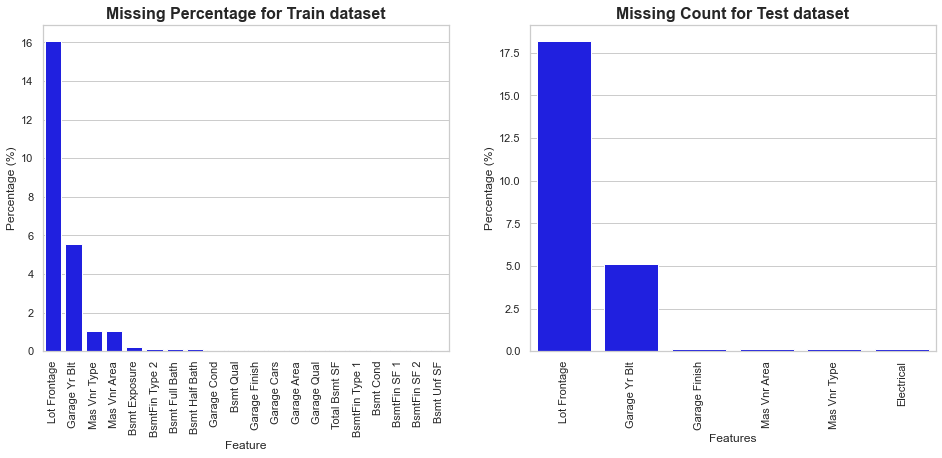

In [134]:
# Visualize the null values for train and test dataset with bar chart
plt.figure(figsize = (16,6))

# Plot for train dataset
plt.subplot(121)
sns.barplot(x=df_train_null['index'], y=df_train_null['train_missing_percent'], color='blue')

# Set the labels
plt.xlabel('Feature')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=90)
plt.title('Missing Percentage for Train dataset',loc='center', fontsize=16, fontweight='bold')

# Plot for test dataset
plt.subplot(122)
sns.barplot(x=df_test_null['index'], y=df_test_null['test_missing_percent'], color='blue')

# Set the labels
plt.xlabel('Features')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=90)
plt.title('Missing Count for Test dataset', loc='center', fontsize=16, fontweight='bold')

In [135]:
# Check for duplicate row for df_train dataset
df_train.duplicated().sum()

0

In [136]:
# Check for duplicate row for df_train dataset
df_test.duplicated().sum()

0

- Both datasets have quite a number of features with missing values. Handling features with missing values will be covered in "Handle missing data" section.
- Train dataset has more features with missing values.
- No duplicate data for both train and test datasets.

In [137]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   object 
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            2051 non-null   object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

### 4.1 Update column names

In [138]:
# Creating a function to update the columns for standardization purpose
def update_column_name(dataframe):
    # Qual, Qu, QC generally refer to the quality of the feature. We will standardize the term to QC
    dataframe.columns = dataframe.columns.str.replace('Qual', 'QC').str.replace('Qu', 'QC')

    # Some of the features are the area. We will standardize and include the term 'Area' for these features
    dataframe.columns = dataframe.columns.str.replace('SF', 'Area')
    
    # Rename Gr Liv Area to Living Area
    dataframe.columns = dataframe.columns.str.replace('Gr Liv Area', 'Living Area')
    
    # Exterior and Exter are the same. We will standardize the term to Exter
    dataframe.columns = dataframe.columns.str.replace('Exterior', 'Exter')   

    # Condition and Cond are the same. We will standardize the term to Cond
    dataframe.columns = dataframe.columns.str.replace('Condition', 'Cond') 

    # Year or Yr are the same. We will standardize the term to Yr
    dataframe.columns = dataframe.columns.str.replace('Year', 'Yr')
    
    # Lowercase the column names
    dataframe.columns = [x.lower() for x in dataframe.columns]
    
    return(dataframe)

In [139]:
# Update column name for df_train
update_column_name(df_train)
df_train.head(3)

id        pid                      ms subclass ms zoning  lot frontage  \
0  109  533352170             2-Story 1946 & Newer        RL           NaN   
1  544  531379050             2-Story 1946 & Newer        RL          43.0   
2  153  535304180  1-Story 1946 & Newer All Styles        RL          68.0   

   lot area street alley lot shape land contour utilities lot config  \
0     13517   Pave    NA       IR1          Lvl    AllPub    CulDSac   
1     11492   Pave    NA       IR1          Lvl    AllPub    CulDSac   
2      7922   Pave    NA       Reg          Lvl    AllPub     Inside   

  land slope neighborhood cond 1 cond 2 bldg type house style  overall qc  \
0        Gtl       Sawyer   RRAe   Norm      1Fam      2Story           6   
1        Gtl      SawyerW   Norm   Norm      1Fam      2Story           7   
2        Gtl        NAmes   Norm   Norm      1Fam      1Story           5   

   overall cond  yr built  yr remod/add roof style roof matl exter 1st  \
0             8      1976          2005      Gable   CompShg   HdBoard   
1             5      1996          1997      Gable   CompShg   VinylSd   
2             7      1953          2007      Gable   CompShg   VinylSd   

  exter 2nd mas vnr type  mas vnr area exter qc exter cond foundation bsmt qc  \
0   Plywood      BrkFace         289.0       Gd         TA     CBlock      TA   
1   VinylSd      BrkFace         132.0       Gd         TA      PConc      Gd   
2   VinylSd         None           0.0       TA         Gd     CBlock      TA   

  bsmt cond bsmt exposure bsmtfin type 1  bsmtfin area 1 bsmtfin type 2  \
0        TA            No            GLQ           533.0            Unf   
1        TA            No            GLQ           637.0            Unf   
2        TA            No            GLQ           731.0            Unf   

   bsmtfin area 2  bsmt unf area  total bsmt area heating heating qc  \
0             0.0          192.0            725.0    GasA         Ex   
1             0.0          276.0            913.0    GasA         Ex   
2             0.0          326.0           1057.0    GasA         TA   

  central air electrical  1st flr area  2nd flr area  low qc fin area  \
0           Y      SBrkr           725           754                0   
1           Y      SBrkr           913          1209                0   
2           Y      SBrkr          1057             0                0   

   living area  bsmt full bath  bsmt half bath  full bath  half bath  \
0         1479             0.0             0.0          2          1   
1         2122             1.0             0.0          2          1   
2         1057             1.0             0.0          1          0   

   bedroom abvgr  kitchen abvgr kitchen qc  totrms abvgrd functional  \
0              3              1         Gd              6        Typ   
1              4              1         Gd              8        Typ   
2              3              1         Gd              5        Typ   

   fireplaces fireplace qc garage type  garage yr blt garage finish  \
0           0           NA      Attchd         1976.0           RFn   
1           1           TA      Attchd         1997.0           RFn   
2           0           NA      Detchd         1953.0           Unf   

   garage cars  garage area garage qc garage cond paved drive  wood deck area  \
0          2.0        475.0        TA          TA           Y               0   
1          2.0        559.0        TA          TA           Y               0   
2          1.0        246.0        TA          TA           Y               0   

   open porch area  enclosed porch  3ssn porch  screen porch  pool area  \
0               44               0           0             0          0   
1               74               0           0             0          0   
2               52               0           0             0          0   

  pool qc fence misc feature  misc val  mo sold  yr sold sale type  saleprice  
0      NA    NA    

In [140]:
# Update column name for df_test
update_column_name(df_test)
df_train.head(3)

id        pid                      ms subclass ms zoning  lot frontage  \
0  109  533352170             2-Story 1946 & Newer        RL           NaN   
1  544  531379050             2-Story 1946 & Newer        RL          43.0   
2  153  535304180  1-Story 1946 & Newer All Styles        RL          68.0   

   lot area street alley lot shape land contour utilities lot config  \
0     13517   Pave    NA       IR1          Lvl    AllPub    CulDSac   
1     11492   Pave    NA       IR1          Lvl    AllPub    CulDSac   
2      7922   Pave    NA       Reg          Lvl    AllPub     Inside   

  land slope neighborhood cond 1 cond 2 bldg type house style  overall qc  \
0        Gtl       Sawyer   RRAe   Norm      1Fam      2Story           6   
1        Gtl      SawyerW   Norm   Norm      1Fam      2Story           7   
2        Gtl        NAmes   Norm   Norm      1Fam      1Story           5   

   overall cond  yr built  yr remod/add roof style roof matl exter 1st  \
0             8      1976          2005      Gable   CompShg   HdBoard   
1             5      1996          1997      Gable   CompShg   VinylSd   
2             7      1953          2007      Gable   CompShg   VinylSd   

  exter 2nd mas vnr type  mas vnr area exter qc exter cond foundation bsmt qc  \
0   Plywood      BrkFace         289.0       Gd         TA     CBlock      TA   
1   VinylSd      BrkFace         132.0       Gd         TA      PConc      Gd   
2   VinylSd         None           0.0       TA         Gd     CBlock      TA   

  bsmt cond bsmt exposure bsmtfin type 1  bsmtfin area 1 bsmtfin type 2  \
0        TA            No            GLQ           533.0            Unf   
1        TA            No            GLQ           637.0            Unf   
2        TA            No            GLQ           731.0            Unf   

   bsmtfin area 2  bsmt unf area  total bsmt area heating heating qc  \
0             0.0          192.0            725.0    GasA         Ex   
1             0.0          276.0            913.0    GasA         Ex   
2             0.0          326.0           1057.0    GasA         TA   

  central air electrical  1st flr area  2nd flr area  low qc fin area  \
0           Y      SBrkr           725           754                0   
1           Y      SBrkr           913          1209                0   
2           Y      SBrkr          1057             0                0   

   living area  bsmt full bath  bsmt half bath  full bath  half bath  \
0         1479             0.0             0.0          2          1   
1         2122             1.0             0.0          2          1   
2         1057             1.0             0.0          1          0   

   bedroom abvgr  kitchen abvgr kitchen qc  totrms abvgrd functional  \
0              3              1         Gd              6        Typ   
1              4              1         Gd              8        Typ   
2              3              1         Gd              5        Typ   

   fireplaces fireplace qc garage type  garage yr blt garage finish  \
0           0           NA      Attchd         1976.0           RFn   
1           1           TA      Attchd         1997.0           RFn   
2           0           NA      Detchd         1953.0           Unf   

   garage cars  garage area garage qc garage cond paved drive  wood deck area  \
0          2.0        475.0        TA          TA           Y               0   
1          2.0        559.0        TA          TA           Y               0   
2          1.0        246.0        TA          TA           Y               0   

   open porch area  enclosed porch  3ssn porch  screen porch  pool area  \
0               44               0           0             0          0   
1               74               0           0             0          0   
2               52               0           0             0          0   

  pool qc fence misc feature  misc val  mo sold  yr sold sale type  saleprice  
0      NA    NA    

###  4.2 Handle missing data

#### 4.2.1 Handle Lot Frontage missing data

- Lot Frontage is a continuous variable and contains value for the linear feet of street connected to property.
- Given that there is ~ 16% and ~18% of missing values in the train and test data respectively, we will replace the missing value with the median value from the df_train dataset.

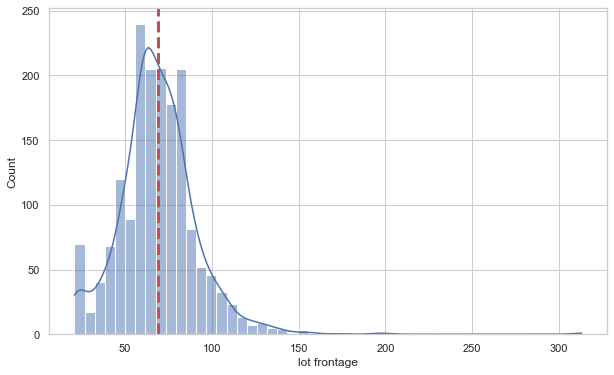

In [141]:
plt.subplots(figsize=(10,6))
sns.histplot(data=df_train, x='lot frontage', bins=50, kde=True)
plt.axvline(df_train['lot frontage'].mean(), color='r', linestyle='dashed', linewidth=3, label='Mean')

In [142]:
# Replace Lot Frontage missing value with median for df_train
print(f"Lot Frontage Median for df_train:, {df_train['lot frontage'].median()}")
df_train['lot frontage'] = df_train['lot frontage'].fillna(value= float(df_train['lot frontage'].median()))
df_train['lot frontage'].isnull().sum()

Lot Frontage Median for df_train:, 68.0


0

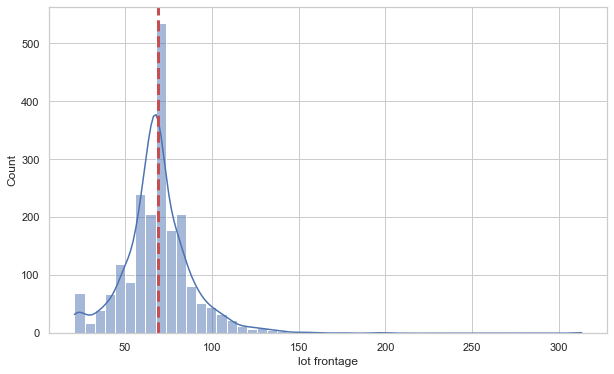

In [143]:
plt.subplots(figsize=(10,6))
sns.histplot(data=df_train, x='lot frontage', bins=50, kde=True)
plt.axvline(df_train['lot frontage'].mean(), color='r', linestyle='dashed', linewidth=3, label='Mean')

In [144]:
# Replace Lot Frontage missing value with df_train median for df_test
df_test['lot frontage'] = df_test['lot frontage'].fillna(value= float(df_train['lot frontage'].median()))
df_test['lot frontage'].isnull().sum()

0

#### 4.2.2 Handle Masonry Veneer related missing data

- Mas Vnr Type and Mas Vnr Area have 22 missing data in df_train and 1 missing data in df_test.
- Mas Vnr Type is a nominal value for the masonry veneer type where it has 5 labels: BrkCmn (Brick Common), BrkFace	(Brick Face), CBlock (Cinder Block), None (None) and Stone (Stone).
- Mas Vnr Area is a continuous variable for the masonry veneer area in square feet.
- Given that the percentage of missing value is small (~1%) for train dataset, and we can't verify if there is masonry veneer, we will drop for df_train. For df_test, we will assume it does not have this since we can't verify it.

In [145]:
# Drop Mas Vnr Type and Mas Vnr Area na rows for df_train
df_train.dropna(subset=['mas vnr type', 'mas vnr area'], inplace=True)

In [146]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2029 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2029 non-null   int64  
 1   pid              2029 non-null   int64  
 2   ms subclass      2029 non-null   object 
 3   ms zoning        2029 non-null   object 
 4   lot frontage     2029 non-null   float64
 5   lot area         2029 non-null   int64  
 6   street           2029 non-null   object 
 7   alley            2029 non-null   object 
 8   lot shape        2029 non-null   object 
 9   land contour     2029 non-null   object 
 10  utilities        2029 non-null   object 
 11  lot config       2029 non-null   object 
 12  land slope       2029 non-null   object 
 13  neighborhood     2029 non-null   object 
 14  cond 1           2029 non-null   object 
 15  cond 2           2029 non-null   object 
 16  bldg type        2029 non-null   object 
 17  house style   

In [147]:
# Check the Mas Vnr Type and Area missing data in df_test
df_test[(df_test['mas vnr type'].isna())]

id        pid  ms subclass ms zoning  lot frontage  lot area street  \
865  868  907260030           60        RL          70.0      8749   Pave   

    alley lot shape land contour utilities lot config land slope neighborhood  \
865    NA       Reg          Lvl    AllPub     Inside        Gtl      CollgCr   

    cond 1 cond 2 bldg type house style  overall qc  overall cond  yr built  \
865   Norm   Norm      1Fam      2Story           7             5      2002   

     yr remod/add roof style roof matl exter 1st exter 2nd mas vnr type  \
865          2002      Gable   CompShg   VinylSd   VinylSd          NaN   

     mas vnr area exter qc exter cond foundation bsmt qc bsmt cond  \
865           NaN       Gd         TA      PConc      Gd        TA   

    bsmt exposure bsmtfin type 1  bsmtfin area 1 bsmtfin type 2  \
865            No            Unf               0            Unf   

     bsmtfin area 2  bsmt unf area  total bsmt area heating heating qc  \
865               0            840              840    GasA         Ex   

    central air electrical  1st flr area  2nd flr area  low qc fin area  \
865           Y      SBrkr           840           885                0   

     living area  bsmt full bath  bsmt half bath  full bath  half bath  \
865         1725               0               0          2          1   

     bedroom abvgr  kitchen abvgr kitchen qc  totrms abvgrd functional  \
865              3              1         Gd              6        Typ   

     fireplaces fireplace qc garage type  garage yr blt garage finish  \
865           0           NA      Attchd         2002.0           RFn   

     garage cars  garage area garage qc garage cond paved drive  \
865            2          550        TA          TA           Y   

     wood deck area  open porch area  enclosed porch  3ssn porch  \
865               0               48               0           0   

     screen porch  pool area pool qc fence misc feature  misc val  mo sold  \
865             0          0      NA    NA           NA         0       11   

     yr sold sale type  
865     2009       WD

In [148]:
# Replace Mas Vnr Area missing value with 0 for df_test
df_test['mas vnr area'] = df_test['mas vnr area'].replace(np.nan, 0.0)

In [149]:
# Replace Mas Vnr Type missing value with 'NA' for df_test
df_test['mas vnr type'] = df_test['mas vnr type'].fillna('NA')

In [150]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               878 non-null    int64  
 1   pid              878 non-null    int64  
 2   ms subclass      878 non-null    int64  
 3   ms zoning        878 non-null    object 
 4   lot frontage     878 non-null    float64
 5   lot area         878 non-null    int64  
 6   street           878 non-null    object 
 7   alley            878 non-null    object 
 8   lot shape        878 non-null    object 
 9   land contour     878 non-null    object 
 10  utilities        878 non-null    object 
 11  lot config       878 non-null    object 
 12  land slope       878 non-null    object 
 13  neighborhood     878 non-null    object 
 14  cond 1           878 non-null    object 
 15  cond 2           878 non-null    object 
 16  bldg type        878 non-null    object 
 17  house style     

#### 4.2.3 Handle Basement related missing data

- The below features related to basement have missing data.

| Variable |Missing data in df_train | Missing data in df_test |Description |
|:-------------------|:------------------|:------------------|:------------------------|
|Bsmt Exposure |4|0|Refers to walkout or garden level walls|
|BsmtFin Type 1|1|0|Rating of basement finished area|
|BsmtFin Type 2|2|0|Rating of basement finished area (if multiple types)|
|Bsmt Full Bath|2|0|Basement full bathrooms|
|Bsmt Half Bath|2|0|Basement half bathrooms|
|Bsmt Qual|1|0|Evaluates the height of the basement|
|Total Bsmt SF|1|0|Total square feet of basement area|
|Bsmt Cond|1|0|Evaluates the general condition of the basement|
|BsmtFin SF 1|1|0|Type 1 finished square feet|
|BsmtFin SF 2|1|0|Type 2 finished square feet|
|Bsmt Unf SF|1|0|Unfinished square feet of basement area|

- No missing data observed for df_test.
- Given that the percentage of missing value is small (~0.1%) and we can't verify these data, we will drop them.

In [151]:
# Drop basement related features with na rows for df_train
df_train.dropna(subset=['bsmt exposure', 'bsmtfin type 1', 'bsmtfin type 2', 
                        'bsmt full bath', 'bsmt half bath', 'bsmt qc', 
                        'total bsmt area', 'bsmt cond', 'bsmtfin area 1', 'bsmtfin area 2',
                        'bsmt unf area'], inplace=True)

In [152]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2023 non-null   int64  
 1   pid              2023 non-null   int64  
 2   ms subclass      2023 non-null   object 
 3   ms zoning        2023 non-null   object 
 4   lot frontage     2023 non-null   float64
 5   lot area         2023 non-null   int64  
 6   street           2023 non-null   object 
 7   alley            2023 non-null   object 
 8   lot shape        2023 non-null   object 
 9   land contour     2023 non-null   object 
 10  utilities        2023 non-null   object 
 11  lot config       2023 non-null   object 
 12  land slope       2023 non-null   object 
 13  neighborhood     2023 non-null   object 
 14  cond 1           2023 non-null   object 
 15  cond 2           2023 non-null   object 
 16  bldg type        2023 non-null   object 
 17  house style   

#### 4.2.4 Handle Garage related missing data

- The below features related to garage have missing data

| Variable | Missing data in df_train | Missing data in df_test |Description |
|:-------------------|:---------------------|:---------------------|:-------------------------------|
|Garage Yr Blt |114|45|Year garage was built|
|Garage Cond |1|0|Garage condition|
|Garage Finish|1|1|Interior finish of the garage|
|Garage Cars|1|0|Size of garage in car capacity|
|Garage Area|1|0|Size of garage in square feet|
|Garage Qual|1|0|Garage quality|

- Except for Garage years built, given that the percentage of missing value is small (~0.1%) and we can't verify these data, we will drop them for the train dataset.
- For Garage year built, we will replace it to 0 as a check on those rows without the year built data are rows that do not have a garage.
- For the Garage Finish missing values in df_test, we will impute it with NA since the Garage Year is also missing.

In [153]:
print(df_train.shape)
print(df_test.shape)

(2023, 81)
(878, 80)


In [154]:
# Groupby Garage Type and check the count of year built data
print('df_train dataset:')
print(df_train.groupby(['garage type'])['garage yr blt'].count())
print()
print('df_test dataset:')
print(df_test.groupby(['garage type'])['garage yr blt'].count())

df_train dataset:
garage type
2Types       19
Attchd     1190
Basment      27
BuiltIn     129
CarPort      11
Detchd      534
NA            0
Name: garage yr blt, dtype: int64

df_test dataset:
garage type
2Types       4
Attchd     518
Basment      9
BuiltIn     53
CarPort      4
Detchd     245
NA           0
Name: garage yr blt, dtype: int64


In [155]:
# Replace Garge Yr Blt missing values with 0 for df_train
df_train['garage yr blt'] = df_train['garage yr blt'].replace(np.nan, 0)

In [156]:
# Drop Garage related features with nan rows for df_train
df_train.dropna(subset=['garage cond', 'garage finish', 'garage cars', 'bsmt full bath', 'bsmt half bath', 'bsmt qc', 
                        'garage area', 'garage qc'], inplace=True)

In [157]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2022 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2022 non-null   int64  
 1   pid              2022 non-null   int64  
 2   ms subclass      2022 non-null   object 
 3   ms zoning        2022 non-null   object 
 4   lot frontage     2022 non-null   float64
 5   lot area         2022 non-null   int64  
 6   street           2022 non-null   object 
 7   alley            2022 non-null   object 
 8   lot shape        2022 non-null   object 
 9   land contour     2022 non-null   object 
 10  utilities        2022 non-null   object 
 11  lot config       2022 non-null   object 
 12  land slope       2022 non-null   object 
 13  neighborhood     2022 non-null   object 
 14  cond 1           2022 non-null   object 
 15  cond 2           2022 non-null   object 
 16  bldg type        2022 non-null   object 
 17  house style   

In [158]:
# Check the Garage Finish missing data in df_test
df_test[(df_test['garage finish'].isna())]

id        pid  ms subclass ms zoning  lot frontage  lot area street  \
764  1357  903426160           60        RM          57.0      8094   Pave   

    alley lot shape land contour utilities lot config land slope neighborhood  \
764  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   

    cond 1 cond 2 bldg type house style  overall qc  overall cond  yr built  \
764   Norm   Norm    2fmCon      2.5Unf           6             8      1910   

     yr remod/add roof style roof matl exter 1st exter 2nd mas vnr type  \
764          1983      Gable   CompShg   Wd Sdng   Wd Sdng         None   

     mas vnr area exter qc exter cond foundation bsmt qc bsmt cond  \
764           0.0       TA         TA      PConc      TA        TA   

    bsmt exposure bsmtfin type 1  bsmtfin area 1 bsmtfin type 2  \
764            Mn            Rec             196            Unf   

     bsmtfin area 2  bsmt unf area  total bsmt area heating heating qc  \
764               0           1046             1242    GasA         Gd   

    central air electrical  1st flr area  2nd flr area  low qc fin area  \
764           Y      SBrkr          1242           742                0   

     living area  bsmt full bath  bsmt half bath  full bath  half bath  \
764         1984               0               0          2          0   

     bedroom abvgr  kitchen abvgr kitchen qc  totrms abvgrd functional  \
764              5              1         TA              8        Typ   

     fireplaces fireplace qc garage type  garage yr blt garage finish  \
764           0           NA      Detchd            NaN           NaN   

     garage cars  garage area garage qc garage cond paved drive  \
764            1          360        NA          NA           Y   

     wood deck area  open porch area  enclosed porch  3ssn porch  \
764              64                0             180           0   

     screen porch  pool area pool qc  fence misc feature  misc val  mo sold  \
764             0          0      NA  MnPrv         Shed      1000        9   

     yr sold sale type  
764     2008       WD

In [159]:
# Replace Garge Yr Blt missing values with 0 for df_test
df_test['garage yr blt'] = df_test['garage yr blt'].replace(np.nan, 0)

In [160]:
# Replace Garage Year missing value with 'NA' for df_test as Garage Year is also missing
df_test['garage finish'] = df_test['garage finish'].fillna('NA')

In [161]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               878 non-null    int64  
 1   pid              878 non-null    int64  
 2   ms subclass      878 non-null    int64  
 3   ms zoning        878 non-null    object 
 4   lot frontage     878 non-null    float64
 5   lot area         878 non-null    int64  
 6   street           878 non-null    object 
 7   alley            878 non-null    object 
 8   lot shape        878 non-null    object 
 9   land contour     878 non-null    object 
 10  utilities        878 non-null    object 
 11  lot config       878 non-null    object 
 12  land slope       878 non-null    object 
 13  neighborhood     878 non-null    object 
 14  cond 1           878 non-null    object 
 15  cond 2           878 non-null    object 
 16  bldg type        878 non-null    object 
 17  house style     

#### 4.2.5 Handle Electrical missing data

There is only 1 missing Electrical data in the df_test dataset. We will impute it with 'SBrkr' (Standard Circuit Breakers & Romex) as the majority of the data is this category.

In [162]:
# Replace Electrical missing value with 'NA' for df_test
df_test['electrical'] = df_test['electrical'].fillna('SBrkr')

In [163]:
# Confirm no missing values for df_train
pd.set_option('max_rows', None)
df_train.isnull().sum().sort_values(ascending=False)

id                 0
heating qc         0
garage type        0
fireplace qc       0
fireplaces         0
functional         0
totrms abvgrd      0
kitchen qc         0
kitchen abvgr      0
bedroom abvgr      0
half bath          0
full bath          0
bsmt half bath     0
bsmt full bath     0
living area        0
low qc fin area    0
2nd flr area       0
1st flr area       0
electrical         0
garage yr blt      0
garage finish      0
garage cars        0
pool area          0
sale type          0
yr sold            0
mo sold            0
misc val           0
misc feature       0
fence              0
pool qc            0
screen porch       0
garage area        0
3ssn porch         0
enclosed porch     0
open porch area    0
wood deck area     0
paved drive        0
garage cond        0
garage qc          0
central air        0
heating            0
pid                0
total bsmt area    0
overall qc         0
house style        0
bldg type          0
cond 2             0
cond 1       

In [164]:
# Confirm no missing values for df_test
pd.set_option('max_rows', None)
df_test.isnull().sum().sort_values(ascending=False)

id                 0
pid                0
fireplace qc       0
fireplaces         0
functional         0
totrms abvgrd      0
kitchen qc         0
kitchen abvgr      0
bedroom abvgr      0
half bath          0
full bath          0
bsmt half bath     0
bsmt full bath     0
living area        0
low qc fin area    0
2nd flr area       0
1st flr area       0
electrical         0
central air        0
garage type        0
garage yr blt      0
garage finish      0
screen porch       0
yr sold            0
mo sold            0
misc val           0
misc feature       0
fence              0
pool qc            0
pool area          0
3ssn porch         0
garage cars        0
enclosed porch     0
open porch area    0
wood deck area     0
paved drive        0
garage cond        0
garage qc          0
garage area        0
heating qc         0
heating            0
total bsmt area    0
utilities          0
house style        0
bldg type          0
cond 2             0
cond 1             0
neighborhood 

#### 4.2.6 Handling continuous features with high '0' values

In [165]:
# Check the total number of 0 for each feature
pd.set_option('max_rows', None)
df_train.isin([0]).sum()

id                    0
pid                   0
ms subclass           0
ms zoning             0
lot frontage          0
lot area              0
street                0
alley                 0
lot shape             0
land contour          0
utilities             0
lot config            0
land slope            0
neighborhood          0
cond 1                0
cond 2                0
bldg type             0
house style           0
overall qc            0
overall cond          0
yr built              0
yr remod/add          0
roof style            0
roof matl             0
exter 1st             0
exter 2nd             0
mas vnr type          0
mas vnr area       1212
exter qc              0
exter cond            0
foundation            0
bsmt qc               0
bsmt cond             0
bsmt exposure         0
bsmtfin type 1        0
bsmtfin area 1      643
bsmtfin type 2        0
bsmtfin area 2     1777
bsmt unf area       164
total bsmt area      53
heating               0
heating qc      

The below continuous feactures have a high percentage of 0s value in the dataset (>10%) and this means they will have a low correlation with sale price. Hence, these features will be dropped.
- mas vnr area
- bsmtfin area 1
- bsmtfin area 2
- 2nd flr area
- low qc fin area
- wood deck area
- open porch area
- enclosed porch
- 3ssn porch
- screen porch
- pool area
- misc val

In [166]:
# Drop the above mentioned columns for df_train data set
df_train.drop(['mas vnr area', 'bsmtfin area 1', 'bsmtfin area 2', '2nd flr area', 'low qc fin area', 
               'wood deck area', 'open porch area','enclosed porch', '3ssn porch', 'pool area', 'screen porch',
               'misc val'], axis=1, inplace=True)

In [167]:
df_train.head(3)

id        pid                      ms subclass ms zoning  lot frontage  \
0  109  533352170             2-Story 1946 & Newer        RL          68.0   
1  544  531379050             2-Story 1946 & Newer        RL          43.0   
2  153  535304180  1-Story 1946 & Newer All Styles        RL          68.0   

   lot area street alley lot shape land contour utilities lot config  \
0     13517   Pave    NA       IR1          Lvl    AllPub    CulDSac   
1     11492   Pave    NA       IR1          Lvl    AllPub    CulDSac   
2      7922   Pave    NA       Reg          Lvl    AllPub     Inside   

  land slope neighborhood cond 1 cond 2 bldg type house style  overall qc  \
0        Gtl       Sawyer   RRAe   Norm      1Fam      2Story           6   
1        Gtl      SawyerW   Norm   Norm      1Fam      2Story           7   
2        Gtl        NAmes   Norm   Norm      1Fam      1Story           5   

   overall cond  yr built  yr remod/add roof style roof matl exter 1st  \
0             8      1976          2005      Gable   CompShg   HdBoard   
1             5      1996          1997      Gable   CompShg   VinylSd   
2             7      1953          2007      Gable   CompShg   VinylSd   

  exter 2nd mas vnr type exter qc exter cond foundation bsmt qc bsmt cond  \
0   Plywood      BrkFace       Gd         TA     CBlock      TA        TA   
1   VinylSd      BrkFace       Gd         TA      PConc      Gd        TA   
2   VinylSd         None       TA         Gd     CBlock      TA        TA   

  bsmt exposure bsmtfin type 1 bsmtfin type 2  bsmt unf area  total bsmt area  \
0            No            GLQ            Unf          192.0            725.0   
1            No            GLQ            Unf          276.0            913.0   
2            No            GLQ            Unf          326.0           1057.0   

  heating heating qc central air electrical  1st flr area  living area  \
0    GasA         Ex           Y      SBrkr           725         1479   
1    GasA         Ex           Y      SBrkr           913         2122   
2    GasA         TA           Y      SBrkr          1057         1057   

   bsmt full bath  bsmt half bath  full bath  half bath  bedroom abvgr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   

   kitchen abvgr kitchen qc  totrms abvgrd functional  fireplaces  \
0              1         Gd              6        Typ           0   
1              1         Gd              8        Typ           1   
2              1         Gd              5        Typ           0   

  fireplace qc garage type  garage yr blt garage finish  garage cars  \
0           NA      Attchd         1976.0           RFn          2.0   
1           TA      Attchd         1997.0           RFn          2.0   
2           NA      Detchd         1953.0           Unf          1.0   

   garage area garage qc garage cond paved drive pool qc fence misc feature  \
0        475.0        TA          TA           Y      NA    NA           NA   
1        559.0        TA          TA           Y      NA    NA           NA   
2        246.0        TA          TA           Y      NA    NA           NA   

   mo sold  yr sold sale type  saleprice  
0        3     2010       WD      130500  
1        4     2009       WD      220000  
2        1     2010       WD      109000

In [168]:
df_train.shape

(2022, 69)

In [169]:
# Drop the above mentioned columns for df_test data set
df_test.drop(['mas vnr area', 'bsmtfin area 1', 'bsmtfin area 2', '2nd flr area', 'low qc fin area', 
               'wood deck area', 'open porch area','enclosed porch', '3ssn porch', 'pool area', 'screen porch',
               'misc val'], axis=1, inplace=True)

In [170]:
df_test.head(3)

id        pid  ms subclass ms zoning  lot frontage  lot area street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL          68.0      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   

  alley lot shape land contour utilities lot config land slope neighborhood  \
0  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1    NA       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2    NA       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   

  cond 1 cond 2 bldg type house style  overall qc  overall cond  yr built  \
0   Norm   Norm    2fmCon      2Story           6             8      1910   
1   Norm   Norm    Duplex      1Story           5             4      1977   
2   Norm   Norm      1Fam      2Story           7             5      2006   

   yr remod/add roof style roof matl exter 1st exter 2nd mas vnr type  \
0          1950      Gable   CompShg   AsbShng   AsbShng         None   
1          1977      Gable   CompShg   Plywood   Plywood         None   
2          2006      Gable   CompShg   VinylSd   VinylSd         None   

  exter qc exter cond foundation bsmt qc bsmt cond bsmt exposure  \
0       TA         Fa      Stone      Fa        TA            No   
1       TA         TA     CBlock      Gd        TA            No   
2       Gd         TA      PConc      Gd        Gd            Av   

  bsmtfin type 1 bsmtfin type 2  bsmt unf area  total bsmt area heating  \
0            Unf            Unf           1020             1020    GasA   
1            Unf            Unf           1967             1967    GasA   
2            GLQ            Unf            100              654    GasA   

  heating qc central air electrical  1st flr area  living area  \
0         Gd           N      FuseP           908         1928   
1         TA           Y      SBrkr          1967         1967   
2         Ex           Y      SBrkr           664         1496   

   bsmt full bath  bsmt half bath  full bath  half bath  bedroom abvgr  \
0               0               0          2          0              4   
1               0               0          2          0              6   
2               1               0          2          1              3   

   kitchen abvgr kitchen qc  totrms abvgrd functional  fireplaces  \
0              2         Fa              9        Typ           0   
1              2         TA             10        Typ           0   
2              1         Gd              7        Typ           1   

  fireplace qc garage type  garage yr blt garage finish  garage cars  \
0           NA      Detchd         1910.0           Unf            1   
1           NA      Attchd         1977.0           Fin            2   
2           Gd      Attchd         2006.0           RFn            2   

   garage area garage qc garage cond paved drive pool qc fence misc feature  \
0          440        Po          Po           Y      NA    NA           NA   
1          580        TA          TA           Y      NA    NA           NA   
2          426        TA          TA           Y      NA    NA           NA   

   mo sold  yr sold sale type  
0        4     2006       WD   
1        8     2006       WD   
2        9     2006       New

In [171]:
df_test.shape

(878, 68)

## 5. Exploratory Data Analysis (EDA)

### 5.1 Summary Statistic

In [172]:
df_train.describe().transpose()

count          mean           std          min  \
id               2022.0  1.473333e+03  8.450278e+02          1.0   
pid              2022.0  7.147327e+08  1.887065e+08  526301100.0   
lot frontage     2022.0  6.879228e+01  2.129918e+01         21.0   
lot area         2022.0  1.003650e+04  6.713691e+03       1300.0   
overall qc       2022.0  6.099407e+00  1.424848e+00          1.0   
overall cond     2022.0  5.568249e+00  1.108217e+00          1.0   
yr built         2022.0  1.971351e+03  3.013948e+01       1872.0   
yr remod/add     2022.0  1.983940e+03  2.103632e+01       1950.0   
bsmt unf area    2022.0  5.652418e+02  4.435225e+02          0.0   
total bsmt area  2022.0  1.055810e+03  4.466700e+02          0.0   
1st flr area     2022.0  1.162318e+03  3.915227e+02        334.0   
living area      2022.0  1.496292e+03  4.993392e+02        334.0   
bsmt full bath   2022.0  4.277943e-01  5.230737e-01          0.0   
bsmt half bath   2022.0  6.429278e-02  2.532734e-01          0.0   
full bath        2022.0  1.570227e+00  5.464689e-01          0.0   
half bath        2022.0  3.679525e-01  4.995016e-01          0.0   
bedroom abvgr    2022.0  2.843719e+00  8.271181e-01          0.0   
kitchen abvgr    2022.0  1.043027e+00  2.101538e-01          0.0   
totrms abvgrd    2022.0  6.433234e+00  1.560980e+00          2.0   
fireplaces       2022.0  5.890208e-01  6.383258e-01          0.0   
garage yr blt    2022.0  1.868723e+03  4.532776e+02          0.0   
garage cars      2022.0  1.772008e+00  7.653737e-01          0.0   
garage area      2022.0  4.725129e+02  2.160098e+02          0.0   
mo sold          2022.0  6.210682e+00  2.742111e+00          1.0   
yr sold          2022.0  2.007778e+03  1.314243e+00       2006.0   
saleprice        2022.0  1.808116e+05  7.914922e+04      12789.0   

                          25%          50%           75%          max  
id               7.522500e+02       1480.5  2.196500e+03       2930.0  
pid              5.284771e+08  535454580.0  9.071801e+08  924152030.0  
lot frontage     6.000000e+01         68.0  7.800000e+01        313.0  
lot area         7.500000e+03       9400.0  1.149800e+04     159000.0  
overall qc       5.000000e+00          6.0  7.000000e+00         10.0  
overall cond     5.000000e+00          5.0  6.000000e+00          9.0  
yr built         1.953000e+03       1973.0  2.000000e+03       2010.0  
yr remod/add     1.964000e+03       1993.0  2.004000e+03       2010.0  
bsmt unf area    2.200000e+02        473.5  8.087500e+02       2336.0  
total bsmt area  7.930000e+02        994.0  1.314000e+03       6110.0  
1st flr area     8.792500e+02       1092.0  1.401500e+03       5095.0  
living area      1.126000e+03       1441.5  1.728000e+03       5642.0  
bsmt full bath   0.000000e+00          0.0  1.000000e+00          3.0  
bsmt half bath   0.000000e+00          0.0  0.000000e+00          2.0  
full bath        1.000000e+00          2.0  2.000000e+00          4.0  
half bath        0.000000e+00          0.0  1.000000e+00          2.0  
bedroom abvgr    2.000000e+00          3.0  3.000000e+00          8.0  
kitchen abvgr    1.000000e+00          1.0  1.000000e+00          3.0  
totrms abvgrd    5.000000e+00          6.0  7.000000e+00         15.0  
fireplaces       0.000000e+00          1.0  1.000000e+00          4.0  
garage yr blt    1.957000e+03       1978.0  2.001000e+03       2010.0  
garage cars      1.000000e+00          2.0  2.000000e+00          5.0  
garage area      3.162500e+02        480.0  5.760000e+02       1418.0  
mo sold          4.000000e+00          6.0  8.000000e+00         12.0  
yr sold          2.007000e+03       2008.0  2.009000e+03       2010.0  
saleprice        1.295000e+05     161000.0  2.131875e+05     611657.0

- There are 2022 sale data in the dataset. 
- The houses were built from 1872 to 2010 and were sold between 2006 to 2010.
- The average living area is 1496 sqft with the smallest area of 334 sqft and largest area of 5642 sqft. 
- For houses with basement, the average total basement area is 1056 sqft. The smallest basement is 0 sqft (no basement) and largest basement area is 6100 sqft.
- The average area for house with garage is 472 sqft. The smallest garage area is 0 sqft (no garage) and largest garage area is 1418 sqft.
- The total number of rooms is 6 with the smallest house having 2 rooms and the largest house having 15 rooms.
- Some of the standard deviation are quite high and this may seem abnormal for some of the features such as Lot Area and Living Area as the max value for the area seem too big for a house.
- The average sale price is \\$180,812. The cheapest house was sold at the price of \\$12,950 while the most expensive house cost \\$611,657.

### 5.2 Sale price distribution

In [173]:
# Check Sale Price statistics
df_train['saleprice'].describe()

count      2022.000000
mean     180811.631553
std       79149.217745
min       12789.000000
25%      129500.000000
50%      161000.000000
75%      213187.500000
max      611657.000000
Name: saleprice, dtype: float64

Text(0.5, 1.0, 'Sales Price (Log Scale) Distribution')

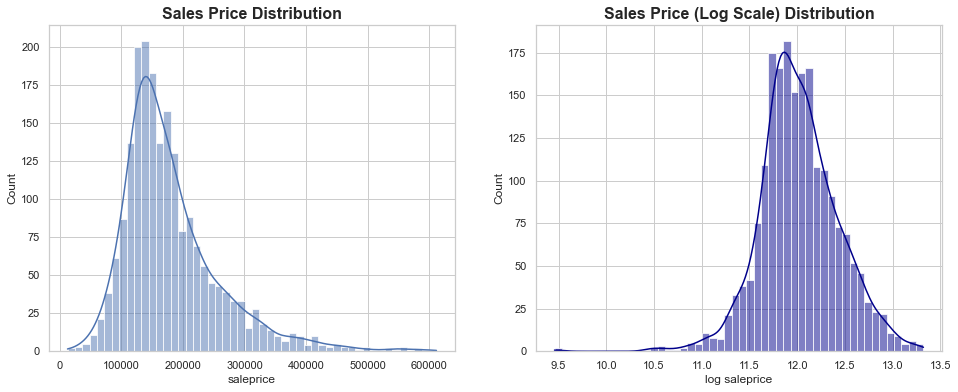

In [174]:
# Plot Sale Price Distribution for df_train
plt.subplots(figsize=(16,6))

plt.subplot(121)
sns.histplot(data=df_train, x='saleprice', stat='count', bins=50, kde=True)
plt.title('Sales Price Distribution',  loc='center', fontsize=16, fontweight='bold')

# Create a new column for log SalePrice
df_train['log saleprice'] = np.log(df_train['saleprice'])

# Plot Lot Sale Price Distribution
plt.subplot(122)
sns.histplot(data=df_train, x='log saleprice', stat='count', color='darkblue', bins=50, kde=True)
plt.title('Sales Price (Log Scale) Distribution', loc='center', fontsize=16, fontweight='bold')

In [175]:
# Filter SalePrice >$500K to see if the price is reasonable based on some of the features related to the house
df_train[df_train['saleprice'] > 550000].transpose()

151                              623   \
id                               2333                              457   
pid                         527212030                        528176030   
ms subclass      2-Story 1946 & Newer  1-Story 1946 & Newer All Styles   
ms zoning                          RL                               RL   
lot frontage                     85.0                            100.0   
lot area                        16056                            14836   
street                           Pave                             Pave   
alley                              NA                               NA   
lot shape                         IR1                              IR1   
land contour                      Lvl                              HLS   
utilities                      AllPub                           AllPub   
lot config                     Inside                           Inside   
land slope                        Gtl                              Mod   
neighborhood                  StoneBr                          NridgHt   
cond 1                           Norm                             Norm   
cond 2                           Norm                             Norm   
bldg type                        1Fam                             1Fam   
house style                    2Story                           1Story   
overall qc                          9                               10   
overall cond                        5                                5   
yr built                         2005                             2004   
yr remod/add                     2006                             2005   
roof style                        Hip                              Hip   
roof matl                     CompShg                          CompShg   
exter 1st                     CemntBd                          CemntBd   
exter 2nd                     CmentBd                          CmentBd   
mas vnr type                    Stone                            Stone   
exter qc                           Gd                               Ex   
exter cond                         TA                               TA   
foundation                      PConc                            PConc   
bsmt qc                            Ex                               Ex   
bsmt cond                          TA                               TA   
bsmt exposure                      Av                               Gd   
bsmtfin type 1                    GLQ                              GLQ   
bsmtfin type 2                    Unf                              Unf   
bsmt unf area                  1752.0                            346.0   
total bsmt area                1992.0                           2492.0   
heating                          GasA                             GasA   
heating qc                         Ex                               Ex   
central air                         Y                                Y   
electrical                      SBrkr                            SBrkr   
1st flr area                     1992                             2492   
living area                      2868                             2492   
bsmt full bath                    0.0                              1.0   
bsmt half bath                    0.0                              0.0   
full bath                           3                                2   
half bath                           1                                1   
bedroom abvgr                       4                                2   
kitchen abvgr                       1                                1   
kitchen qc                         Ex                               Ex   
totrms abvgrd                      11                                8   
functional                        Typ                              Typ   
fireplaces                          1                                1   
fireplace qc                       Gd

- The distribution is normally distributed with some degree of right-skewness. The peak is around the \\$150k mark. A maximum of \\$611,657 is observed, with a minimum of \\$12,950 There are a few high sale price observed leading to a longer tail towards the higher prices.  When a log function is applied to the variable, it transforms the skewed variable into a more normalized dataset and better approximates a normal distribution.
- Looking at the above data, houses that sold at >\\$500K shows that the houses are generally bigger in size with high ratings on the overall quality and condition. It also has excellent basement and kitchen quality.

### 5.3 Histogram plots for continuous features

In [176]:
# Create a function to plot histograms for continuous features
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, sharex=False, sharey=True, squeeze=True, figsize=(15,10))
    plt.subplots_adjust(hspace = 0.5)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], bins=50)
        ax[i].set_title(list_of_titles[i]) 
        ax[i].set_xlabel(list_of_xlabels[i]) # Set titles, labels, etc here for each subplot
        ax[i].axvline(dataframe[column].median(), color='r', linestyle='dashed', linewidth=3, label='Median')
        ax[i].axvline(dataframe[column].mean(), color='k', linestyle='dashed', linewidth=3, label = 'Mean')
        ax[i].legend()

In [177]:
# Set up the columns, title and x-axis labels for the histogram plots
histogram_columns = ['lot frontage', 'lot area', 'total bsmt area', '1st flr area', 'living area', 
                     'garage area']

title_list = ['Lot Frontage Distribution', 'Lot Area Distribution', 'Total Basement Area Distribution', 
              'First Floor Area Distribution', 'Living Area Distribution', 'Garage Area Distribution']

xlabel_list = ['Lot Frontage', 'Lot Area', 'Total Basement Area', 'First Floor Area','Living Area', 'Garage Area']

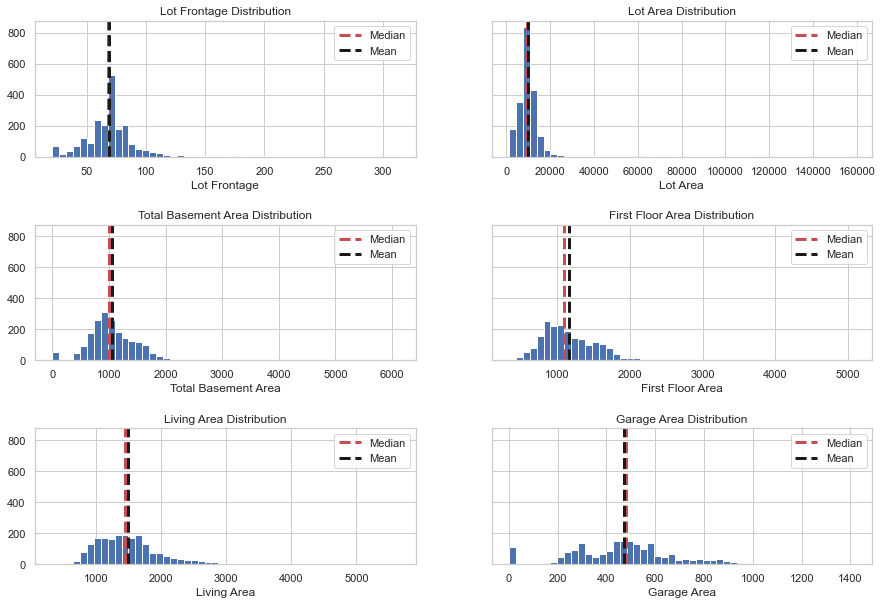

In [178]:
subplot_histograms(df_train, histogram_columns, title_list, xlabel_list)

From the histogram plots, the distribution is somewhat normal with slight right-skewness. There may be some data with large area. We will check this further in the subsequent plots.

In [179]:
# Create a function to plot scatterplot for numeric feature or boxplot for non-numeric feature
def EDA_subplot(dataframe, features_list, rows, cols):

    plt.figure(figsize = (cols*10, rows*10))
    plt.subplots_adjust(hspace = 0.2)
    for i in range(len(features_list)):
        plt.subplot(rows, cols, i+1)
        
        # If numeric data feature, plot scatter
        if pd.api.types.is_numeric_dtype(dataframe[features_list[i]]):
            sns.scatterplot(data = dataframe, x = features_list[i], y = 'saleprice')
            plt.title(f'{features_list[i]} vs Sale Price', loc = 'center', fontsize = 16, fontweight = 'bold')
        
        # If non-numeric data feature, plot boxplot
        else:
            sns.boxplot(data = dataframe, x = 'saleprice', y = features_list[i], width = 0.5)
            plt.title(f'{features_list[i]} vs Sale Price', loc = 'center', fontsize = 16, fontweight = 'bold')
            plt.xticks(rotation = 90)    

### 5.4 Neighbourhood area

Neigborhood area includes the below 3 features. All 3 features are nominal data type.
- Neighborhood: Physical locations within Ames city limits
- Condition 1: Proximity to various conditions
- Condition 2: Proximity to various conditions (if more than one is present)


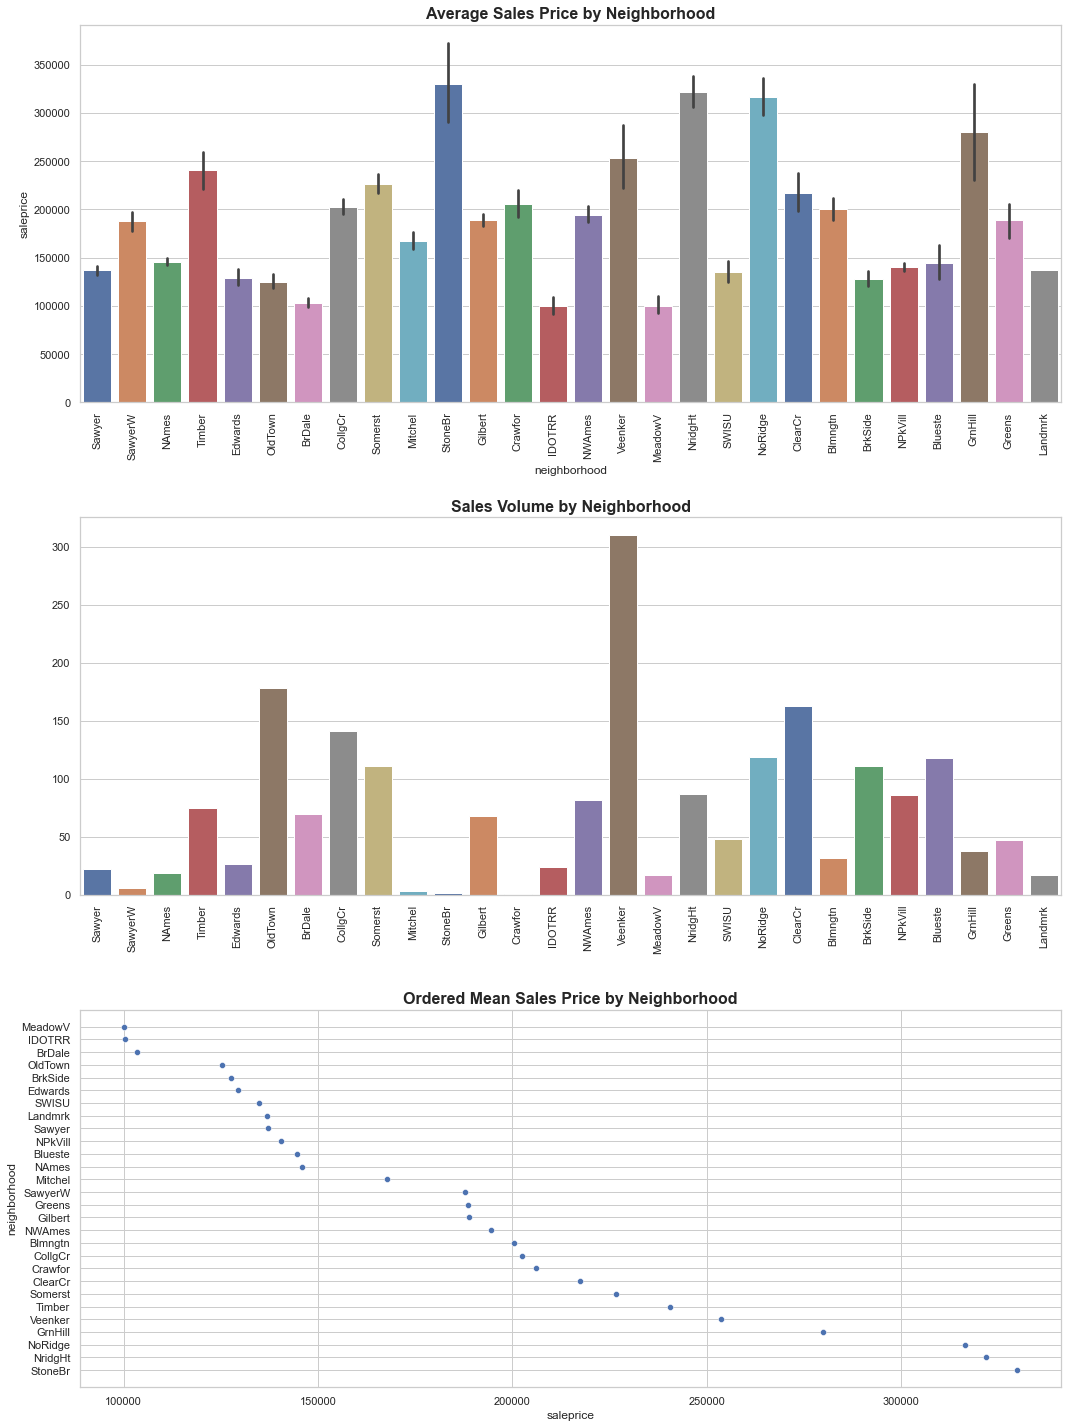

In [180]:
plt.figure(figsize=(15,20))

plt.subplot(311)
sns.barplot(x = df_train['neighborhood'], y = df_train['saleprice'], palette = "deep")
plt.title('Average Sales Price by Neighborhood', loc = 'center', fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 90)

plt.subplot(312)
sns.barplot(x = df_train['neighborhood'].unique(), y = df_train.groupby('neighborhood').size(), palette = "deep")
plt.title('Sales Volume by Neighborhood', loc = 'center', fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 90)


plt.subplot(313)
df_neighborhood = pd.DataFrame(df_train.groupby('neighborhood').mean()['saleprice']).sort_values(by = 'saleprice').reset_index()
sns.scatterplot(x = df_neighborhood['saleprice'], y = df_neighborhood['neighborhood'])
plt.title('Ordered Mean Sales Price by Neighborhood', loc = 'center', fontsize = 16, fontweight = 'bold')

plt.tight_layout(h_pad=2)

- Houses located in Stone Brook, Northridge Heights and Northridge area have a higher sale price.
- Veenker seems to be a popular neighborhood as it has the highest sale volume.
- There seems to be 4 clusters in terms of the sale price among the neighborhood. We can consider to cluster them into 4 different neighbourhood area.

In [181]:
# Map neighborhood into cluster 1 to 4 for df_train
# Cluster 1: MeadowV : BrDale
# Cluster 2: Oldtown : Mitchel
# Cluster 3: SawyerW : GrnHill
# Cluster 4: NoRidge : StoneBr

df_train['neighborhood cluster']= 1
df_train['neighborhood cluster'].iloc[3:13] = 2
df_train['neighborhood cluster'].iloc[13:25] = 3
df_train['neighborhood cluster'].iloc[25:] = 4

df_train.head()

C:\Users\Priscilla Ng\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


id        pid                      ms subclass ms zoning  lot frontage  \
0  109  533352170             2-Story 1946 & Newer        RL          68.0   
1  544  531379050             2-Story 1946 & Newer        RL          43.0   
2  153  535304180  1-Story 1946 & Newer All Styles        RL          68.0   
3  318  916386060             2-Story 1946 & Newer        RL          73.0   
4  255  906425045    1-1/2 Story Finished All Ages        RL          82.0   

   lot area street alley lot shape land contour utilities lot config  \
0     13517   Pave    NA       IR1          Lvl    AllPub    CulDSac   
1     11492   Pave    NA       IR1          Lvl    AllPub    CulDSac   
2      7922   Pave    NA       Reg          Lvl    AllPub     Inside   
3      9802   Pave    NA       Reg          Lvl    AllPub     Inside   
4     14235   Pave    NA       IR1          Lvl    AllPub     Inside   

  land slope neighborhood cond 1 cond 2 bldg type house style  overall qc  \
0        Gtl       Sawyer   RRAe   Norm      1Fam      2Story           6   
1        Gtl      SawyerW   Norm   Norm      1Fam      2Story           7   
2        Gtl        NAmes   Norm   Norm      1Fam      1Story           5   
3        Gtl       Timber   Norm   Norm      1Fam      2Story           5   
4        Gtl      SawyerW   Norm   Norm      1Fam      1.5Fin           6   

   overall cond  yr built  yr remod/add roof style roof matl exter 1st  \
0             8      1976          2005      Gable   CompShg   HdBoard   
1             5      1996          1997      Gable   CompShg   VinylSd   
2             7      1953          2007      Gable   CompShg   VinylSd   
3             5      2006          2007      Gable   CompShg   VinylSd   
4             8      1900          1993      Gable   CompShg   Wd Sdng   

  exter 2nd mas vnr type exter qc exter cond foundation bsmt qc bsmt cond  \
0   Plywood      BrkFace       Gd         TA     CBlock      TA        TA   
1   VinylSd      BrkFace       Gd         TA      PConc      Gd        TA   
2   VinylSd         None       TA         Gd     CBlock      TA        TA   
3   VinylSd         None       TA         TA      PConc      Gd        TA   
4   Plywood         None       TA         TA      PConc      Fa        Gd   

  bsmt exposure bsmtfin type 1 bsmtfin type 2  bsmt unf area  total bsmt area  \
0            No            GLQ            Unf          192.0            725.0   
1            No            GLQ            Unf          276.0            913.0   
2            No            GLQ            Unf          326.0           1057.0   
3            No            Unf            Unf          384.0            384.0   
4            No            Unf            Unf          676.0            676.0   

  heating heating qc central air electrical  1st flr area  living area  \
0    GasA         Ex           Y      SBrkr           725         1479   
1    GasA         Ex           Y      SBrkr           913         2122   
2    GasA         TA           Y      SBrkr          1057         1057   
3    GasA         Gd           Y      SBrkr           744         1444   
4    GasA         TA           Y      SBrkr           831         1445   

   bsmt full bath  bsmt half bath  full bath  half bath  bedroom abvgr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2          1              3   
4             0.0             0.0          2          0              3   

   kitchen abvgr kitchen qc  totrms abvgrd functional  fireplaces  \
0              1         Gd              6        Typ           0   
1              1         Gd              8        Typ           1   
2              1         Gd              5        Typ           0   
3              1         TA              7        Typ           0   
4        

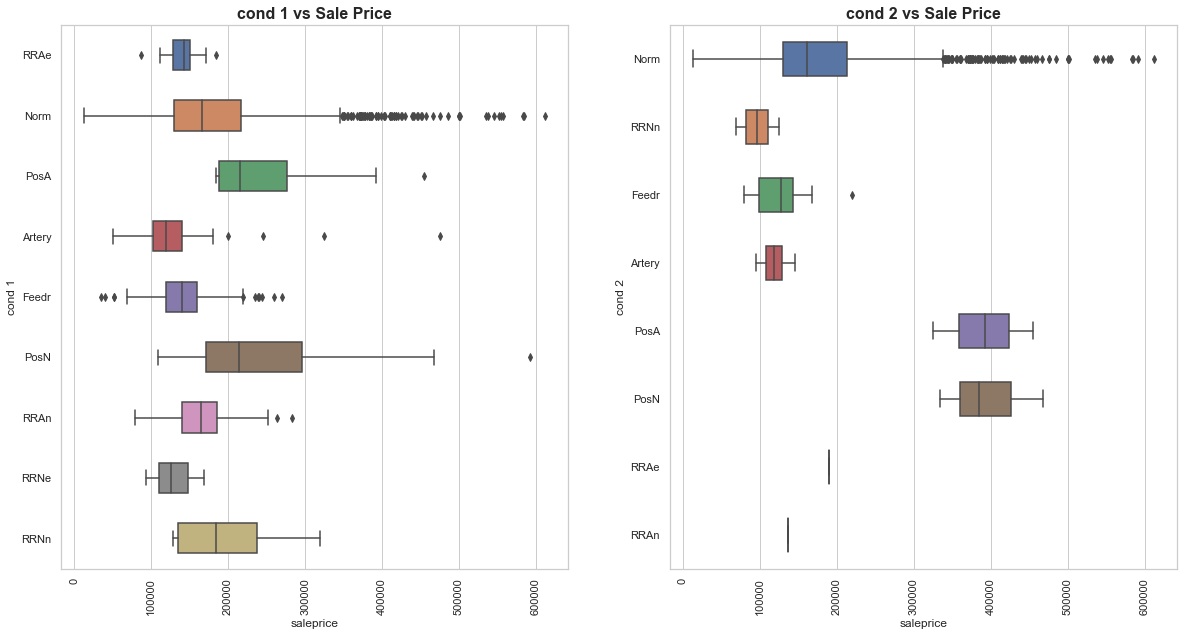

In [182]:
# Create the neighbourhood area feature list and plot the visulization related to these features
neigbourhood_condition_list = ['cond 1', 'cond 2']
EDA_subplot(df_train, neigbourhood_condition_list, 1, 2)

**Negibourhood Area Findings:**

- In terms of the proximity to various conditions (condition 1 and 2), most of the sales has Normal proximity.
- If there is more than 1 condition (i.e. Condition 2), adjacent to postive off-site feature and near positive off-site feature--park, greenbelt, etc. has a higher sale price. Condition 2 seem to show a stronger correlation than Condition 1.

### 5.5 Property related

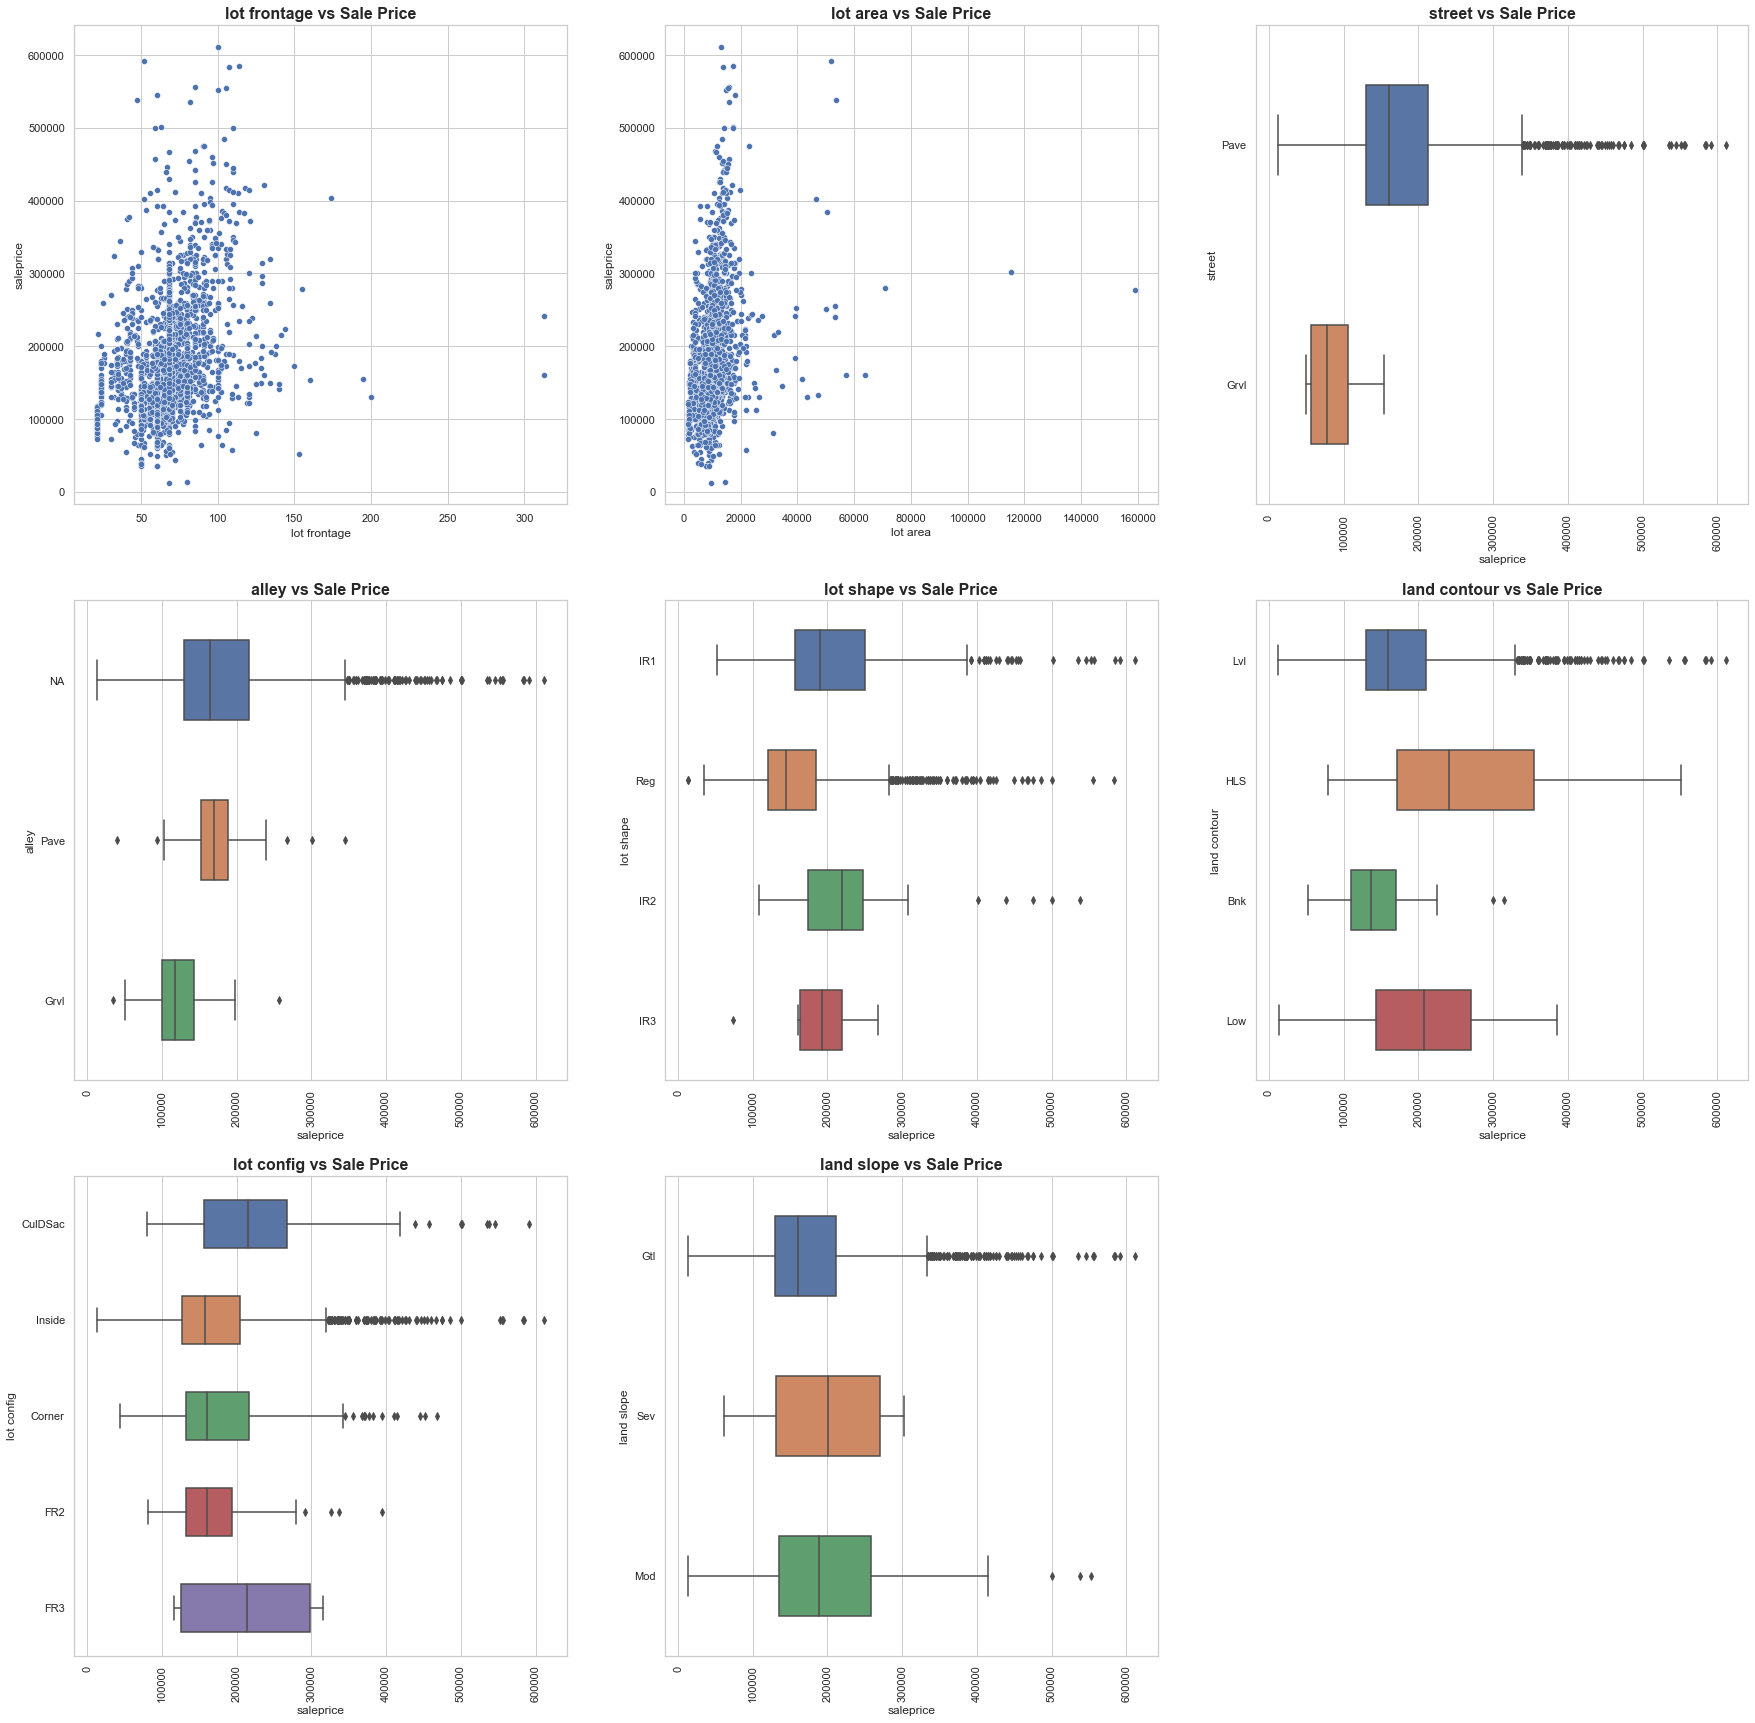

In [183]:
# Create the property related feature list and plot the visulization related to these features
property_list = [lot for lot in df_train if 'lot' in lot or 'land' in lot or 'street' in lot or 'alley' in lot]
EDA_subplot(df_train, property_list, 3, 3)

In [184]:
# Check the data that has Lot Area > 100,000
df_train[(df_train['lot area'] > 100000)].transpose()

471  \
id                                             2116   
pid                                       906426060   
ms subclass           1-1/2 Story Finished All Ages   
ms zoning                                        RL   
lot frontage                                   68.0   
lot area                                     159000   
street                                         Pave   
alley                                            NA   
lot shape                                       IR2   
land contour                                    Low   
utilities                                    AllPub   
lot config                                  CulDSac   
land slope                                      Sev   
neighborhood                                ClearCr   
cond 1                                         Norm   
cond 2                                         Norm   
bldg type                                      1Fam   
house style                                  1.5Fin   
overall qc                                        6   
overall cond                                      7   
yr built                                       1958   
yr remod/add                                   2006   
roof style                                    Gable   
roof matl                                   CompShg   
exter 1st                                   Wd Sdng   
exter 2nd                                   HdBoard   
mas vnr type                                 BrkCmn   
exter qc                                         Gd   
exter cond                                       TA   
foundation                                   CBlock   
bsmt qc                                          Gd   
bsmt cond                                        TA   
bsmt exposure                                    Gd   
bsmtfin type 1                                  Rec   
bsmtfin type 2                                  Unf   
bsmt unf area                                 747.0   
total bsmt area                              1444.0   
heating                                        GasA   
heating qc                                       Gd   
central air                                       Y   
electrical                                    SBrkr   
1st flr area                                   1444   
living area                                    2144   
bsmt full bath                                  0.0   
bsmt half bath                                  1.0   
full bath                                         2   
half bath                                         0   
bedroom abvgr                                     4   
kitchen abvgr                                     1   
kitchen qc                                       Gd   
totrms abvgrd                                     7   
functional                                      Typ   
fireplaces                                        2   
fireplace qc                                     TA   
garage type                                  Attchd   
garage yr blt                                1958.0   
garage finish                                   Fin   
garage cars                                     2.0   
garage area                                   389.0   
garage qc                                        TA   
garage cond                                      TA   
paved drive                                       Y   
pool qc                                          NA   
fence                                            NA   
misc feature                                   Shed   
mo sold                                           6   
yr sold                                        2007   
sale type                                       WD    
saleprice                                    277000   
log saleprice                             12.531773   
neighborhood cluster                              4   

                                                  694  
id                             

In [185]:
# Check the Lot Area median by Lot Config to see if the 2 data is abnormal
df_train.groupby(['lot config'])['lot area'].median()

lot config
Corner     10340.0
CulDSac    12361.0
FR2         9000.0
FR3        11368.0
Inside      9039.5
Name: lot area, dtype: float64

In [186]:
# Check the data that has Lot Frontage > 300
df_train[(df_train['lot frontage']>300)].transpose()

960                              1335
id                                    1499                             1266
pid                              908154235                        535427070
ms subclass           2-Story 1946 & Newer  1-Story 1946 & Newer All Styles
ms zoning                               RL                               RL
lot frontage                         313.0                            313.0
lot area                             63887                            27650
street                                Pave                             Pave
alley                                   NA                               NA
lot shape                              IR3                              IR2
land contour                           Bnk                              HLS
utilities                           AllPub                           AllPub
lot config                          Corner                           Inside
land slope                             Gtl                              Mod
neighborhood                       Edwards                            NAmes
cond 1                               Feedr                             PosA
cond 2                                Norm                             Norm
bldg type                             1Fam                             1Fam
house style                         2Story                           1Story
overall qc                              10                                7
overall cond                             5                                7
yr built                              2008                             1960
yr remod/add                          2008                             2007
roof style                             Hip                             Flat
roof matl                          ClyTile                          Tar&Grv
exter 1st                           Stucco                          Wd Sdng
exter 2nd                           Stucco                          Wd Sdng
mas vnr type                         Stone                             None
exter qc                                Ex                               TA
exter cond                              TA                               TA
foundation                           PConc                           CBlock
bsmt qc                                 Ex                               Gd
bsmt cond                               TA                               TA
bsmt exposure                           Gd                               Gd
bsmtfin type 1                         GLQ                              GLQ
bsmtfin type 2                         Unf                              Unf
bsmt unf area                        466.0                            160.0
total bsmt area                     6110.0                            585.0
heating                               GasA                             GasA
heating qc                              Ex                               Ex
central air                              Y                                Y
electrical                           SBrkr                            SBrkr
1st flr area                          4692                             2069
living area                           5642                             2069
bsmt full bath                         2.0                              1.0
bsmt half bath                         0.0                              0.0
full bath                                2                                2
half bath                                1                                0
bedroom abvgr                            3                                4
kitchen abvgr                            1                                1
kitchen qc                              Ex                               Gd
totrms abvgrd                           12                                9
functional                             Typ                              Typ
fireplaces

**Property Related Findings:**

- Houses with a paved street or paved alley fetch higher sale prices.
- Houses with banked contour is sold at a lower price as compared to houses with hillside contour.
- Houses with frontage on 3 sides of property show a wider price distribution.
- The data seem to have 2 outliers as seen in the Lot Area visualization where the data show it is abnormally high. We should consider removing it.

### 5.6 Dwelling related

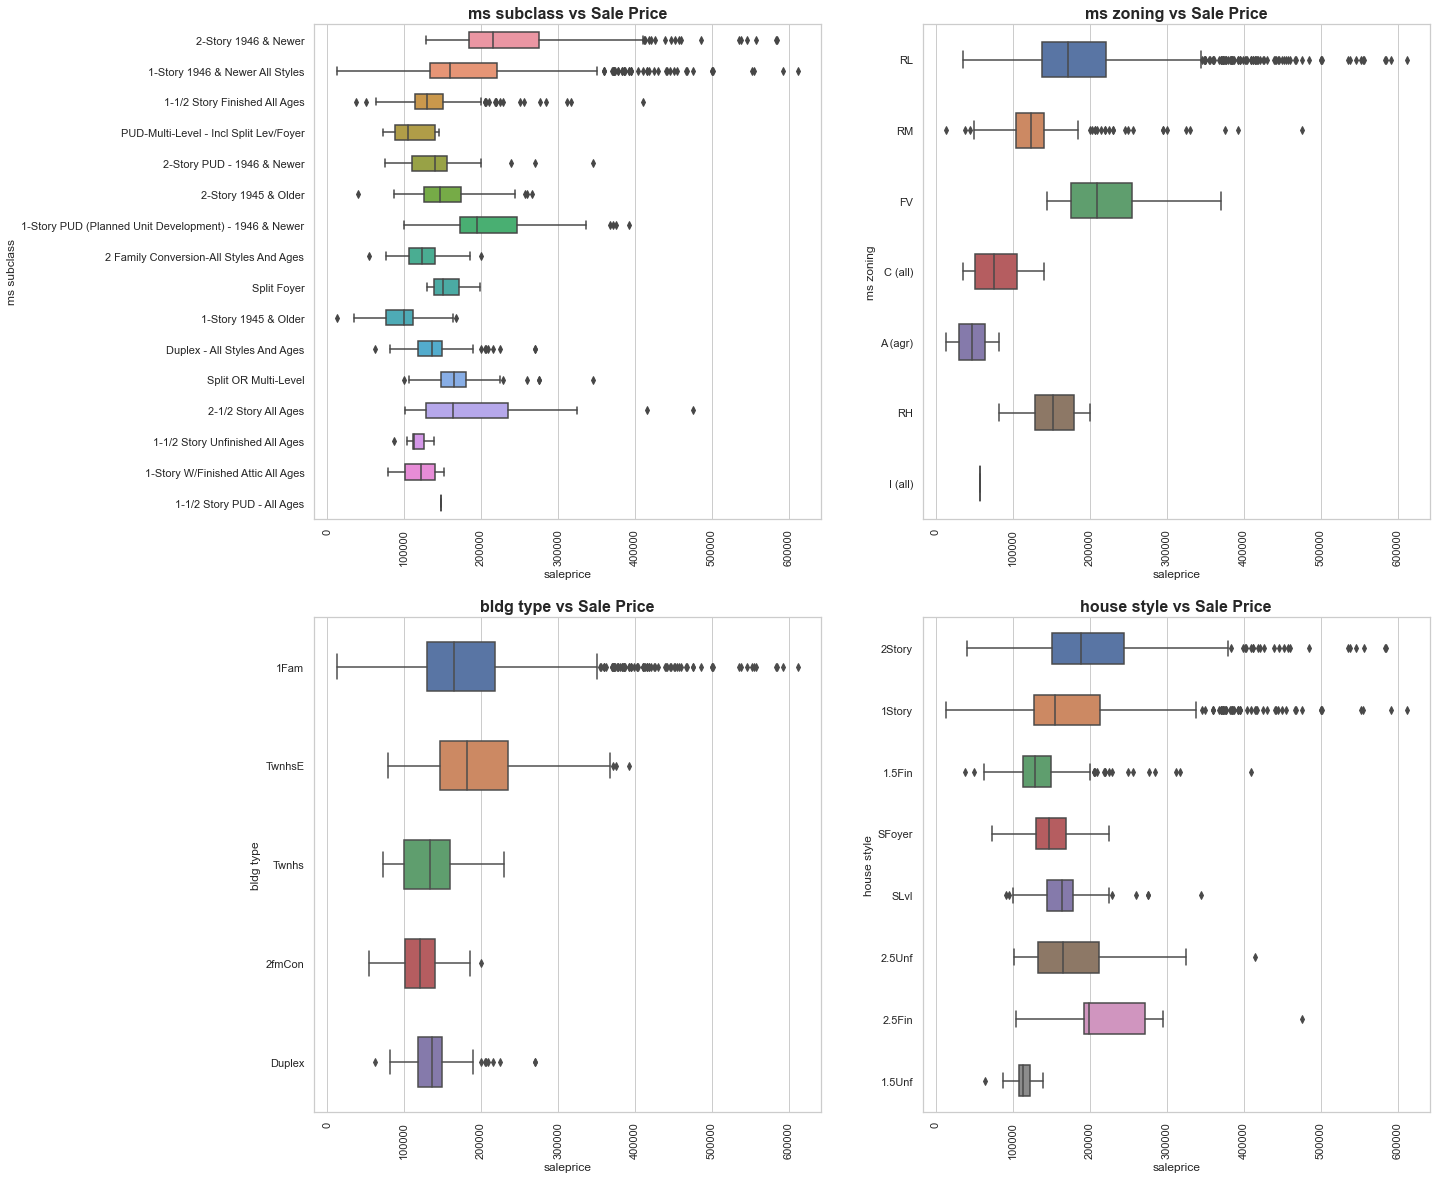

In [187]:
# Create the dwelling and zones related feature list and plot the visulization related to these features
dwelling_list = ['ms subclass', 'ms zoning', 'bldg type', 'house style']
EDA_subplot(df_train, dwelling_list, 2, 2)

**Dwelling Related Findings:**

- MS subclass identifies the type of dwelling involved in the sale. Majority of the sale comes from 1-Story 1946 & Newer All Styles and 2-Story 1946 & Newer.
- For the MS Zoning (general zoning classification of the sale), a Floating Village Residential (FV) has a higher sale price.
- Single-family Detached (1Fam) and Townhouse End Unit (TwnhsE) type of dwelling has a higher sale price as compared to others.
- One and one-half story: 2nd level unfinished (1.5Fin) house style has a lower pricing while Two and one-half story: 2nd level finished (2.5Fin) and Two story (2Story) show a higher sale price.
- Building type seem to have a stronger correlation to the sale price as compared to the other features.

### 5.7 House overall related

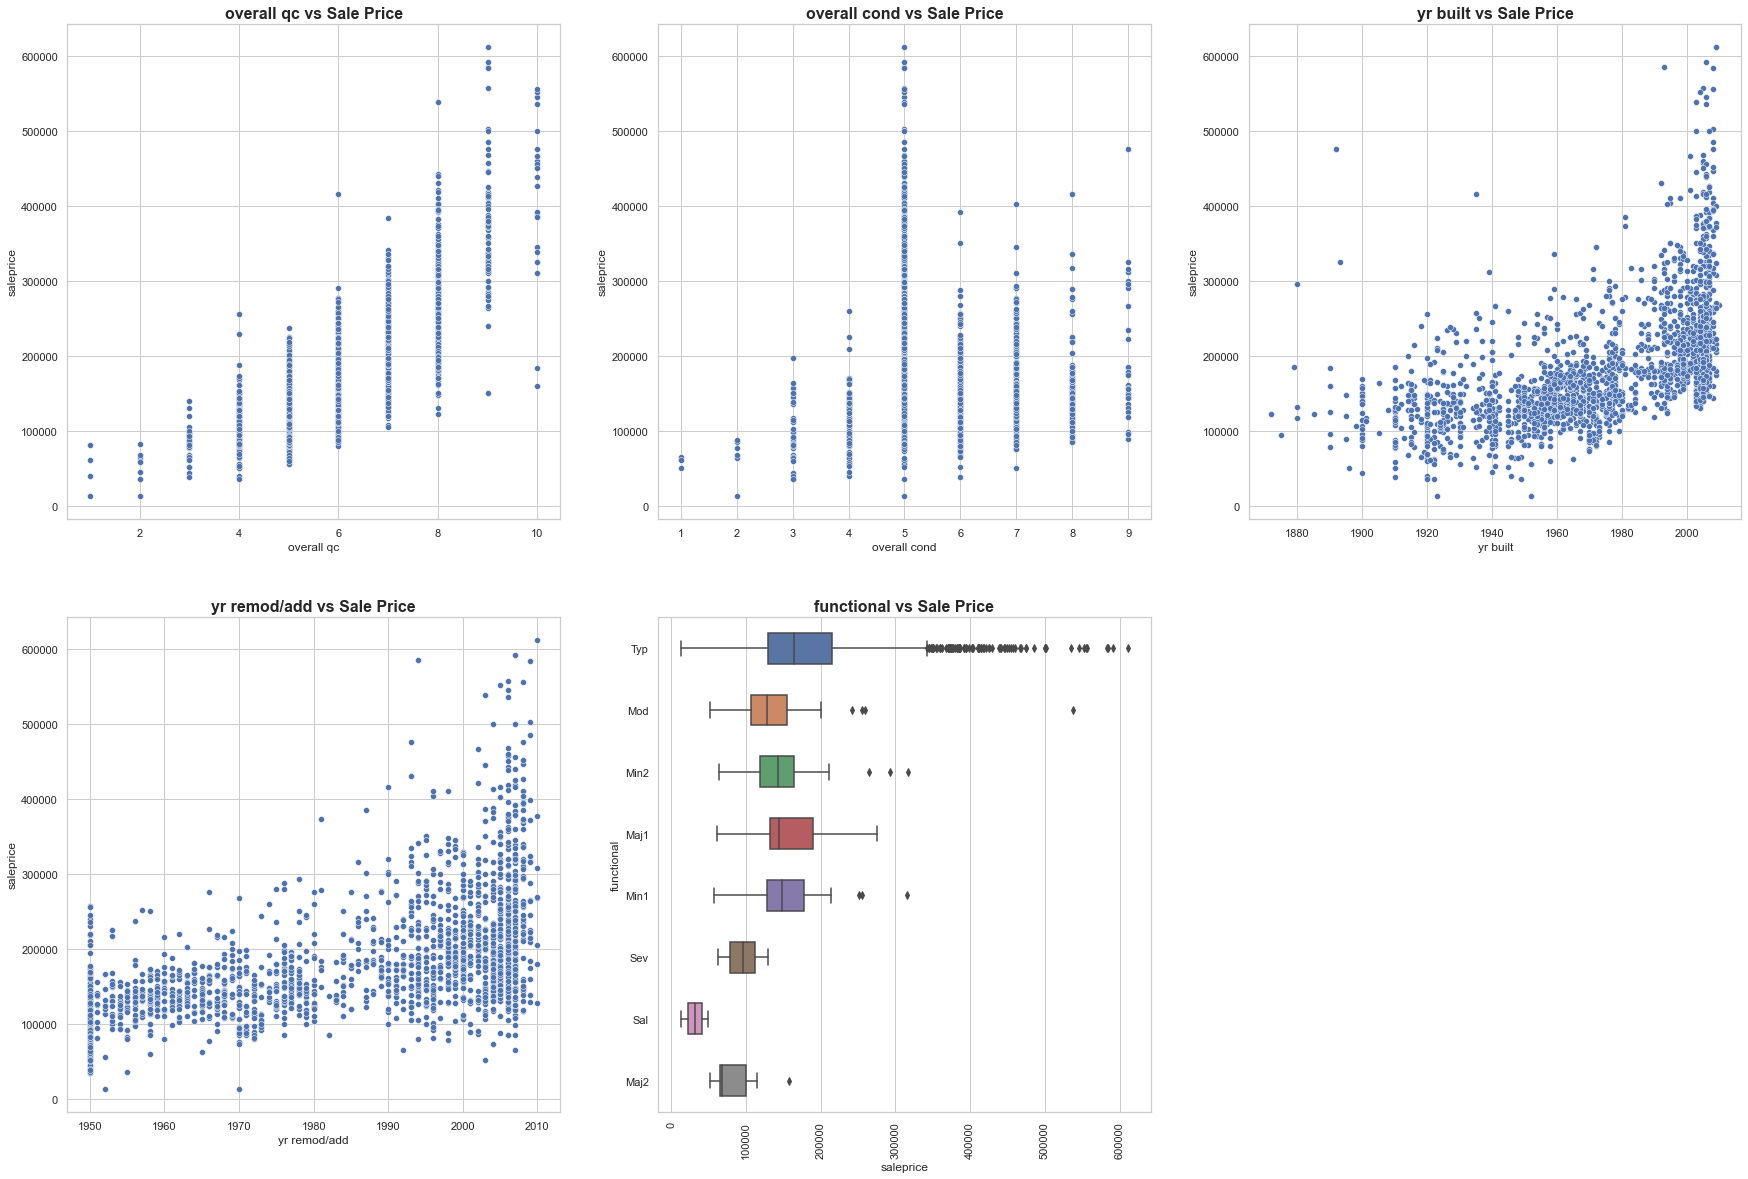

In [188]:
# Create the overall condition of house related feature list and plot the visulization related to these features
house_overall_list = ['overall qc', 'overall cond', 'yr built', 'yr remod/add', 'functional']
EDA_subplot(df_train, house_overall_list, 2, 3)

**House Overall Condition Related Findings:**

- The better the condition for the overall material and finish of the house (i.e. a higher rating), the higher the sale price. The Overall quality shows a strong correlation to the sale price.
- For the the overall condition of the house, a better overall condition brings a higher sale price. The relation is not as significant as the condition for the overall material and finish of the house.
- Older house has a lower sale price as compared to newer house.
- A house that underwent remodel seem to have a higher pricing.
- Home functionality seem to show a correlation where a home with the Salvage only (Sal) functionality has a low sale price.

### 5.8 House exterior related

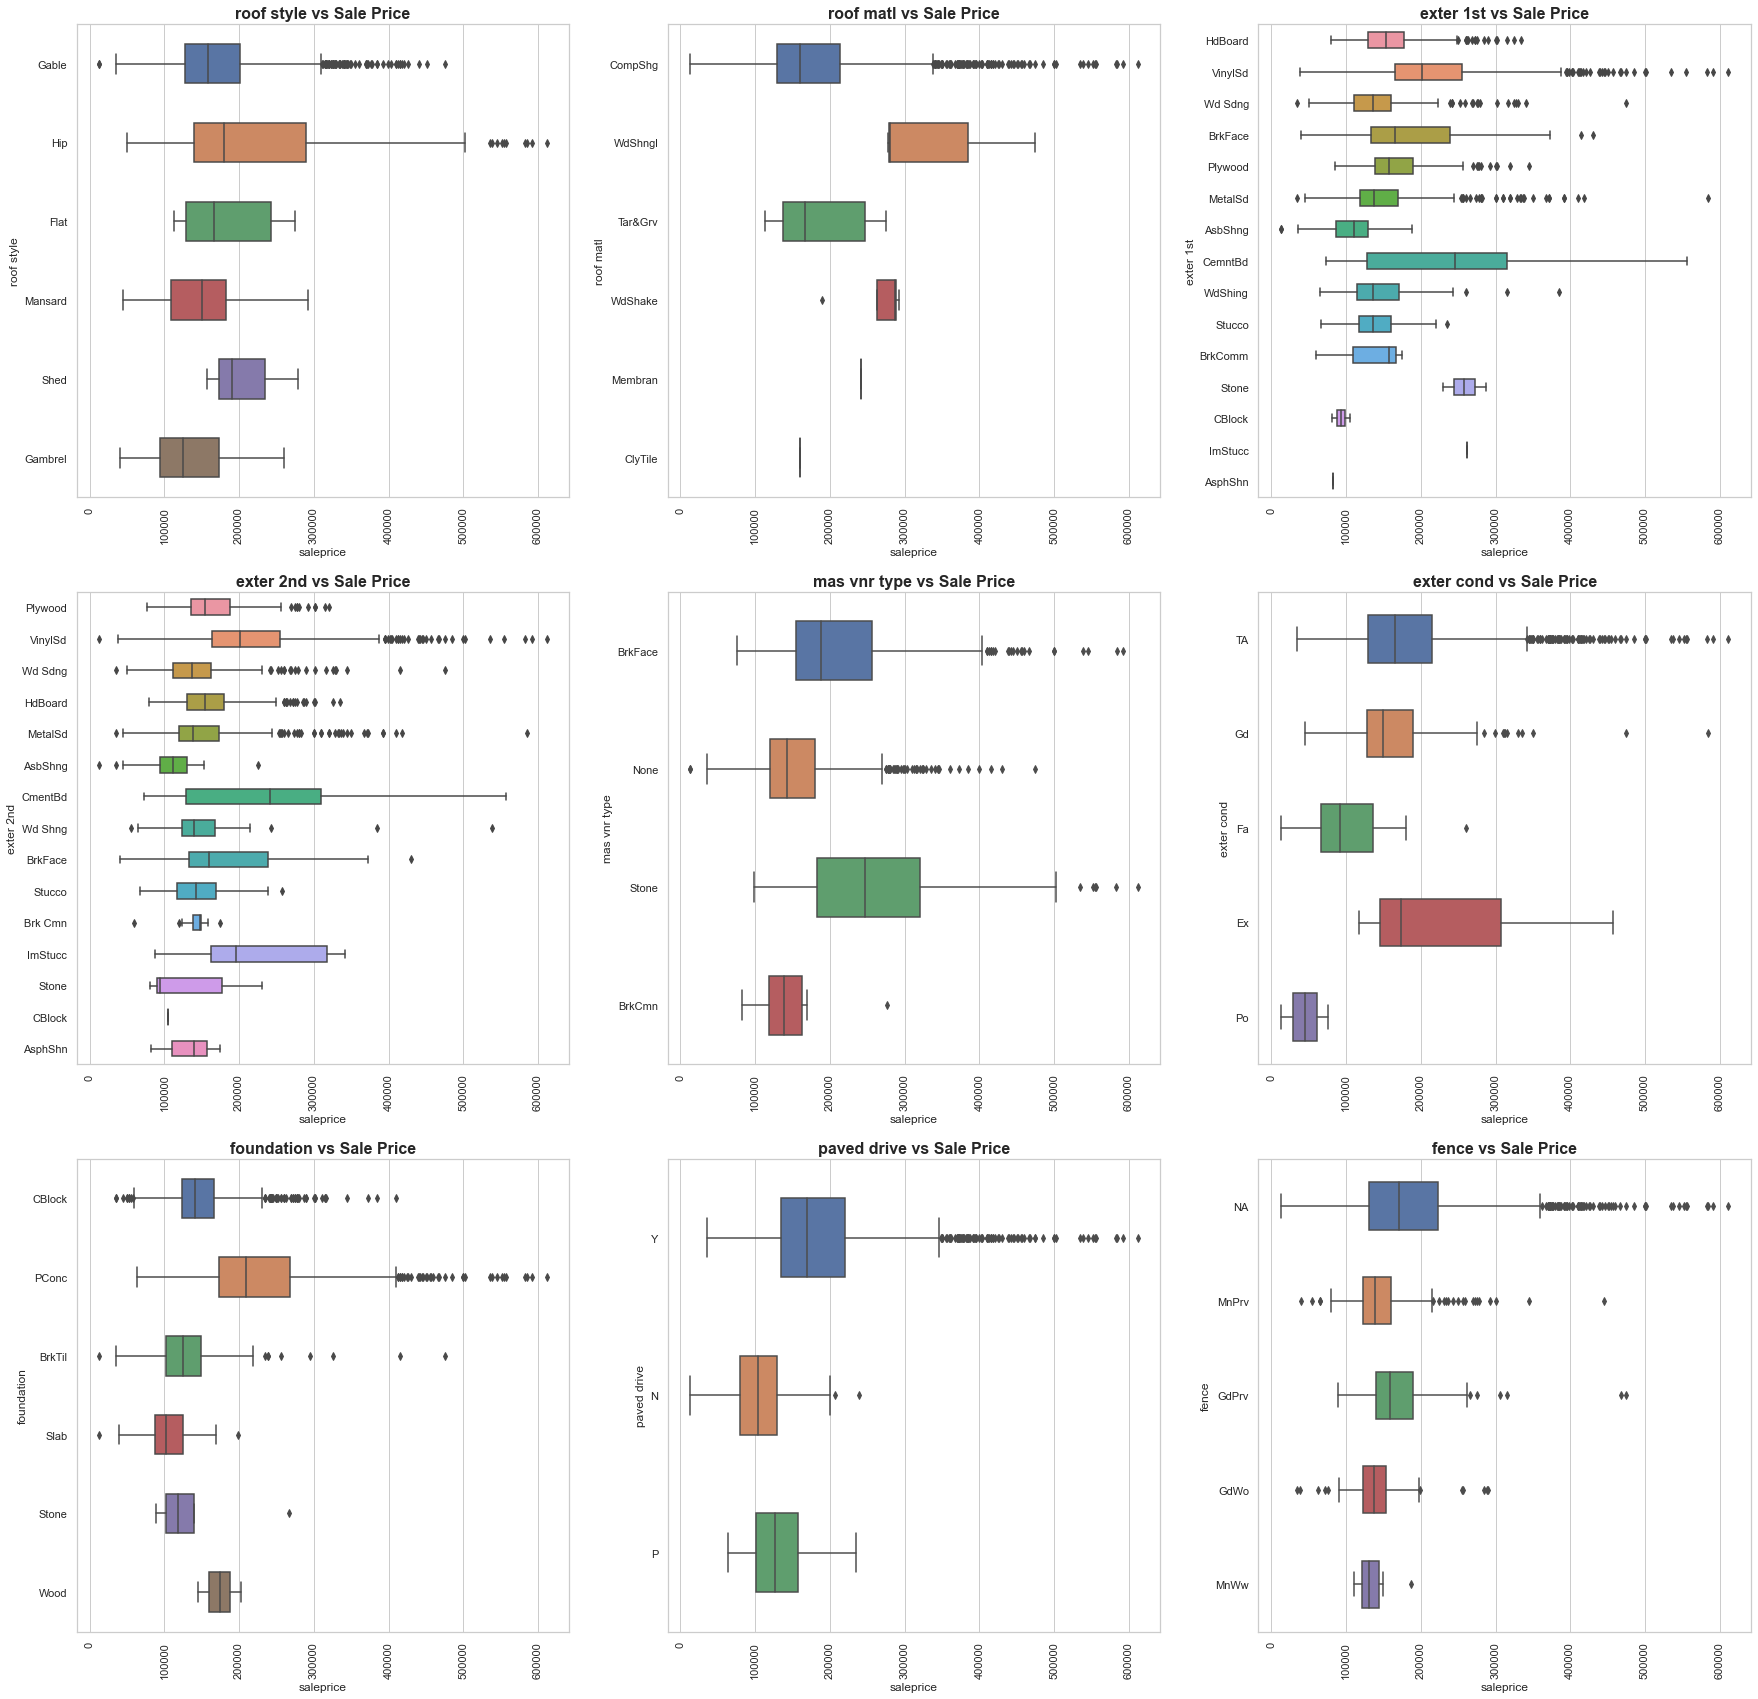

In [189]:
# Create the house exterior feature list and plot the visulization related to these features
house_exterior_list = ['roof style', 'roof matl', 'exter 1st', 'exter 2nd', 'mas vnr type', 'exter cond', 
                       'foundation', 'paved drive', 'fence']
EDA_subplot(df_train, house_exterior_list, 4, 3)

**House Exterior Findings:**

- Wood Shingles (WdShngl) and Wood Shakes (WdShake) roof material has a higher sale price as compared to other materials.
- Exterior made of Cement Board (CemntBd) has a higher and wider range of sale price. Exterior made of Vinyl Siding (VinylSd) and Metal Siding (MetalSd) show there are quite a number of sales with higher sale price also.
- Masonry veneer made of Stone and a large masonry veneer area has a higher pricing.
- An excellent exterior condition (present condition of the material) has a higher sale price.
- Poured Contrete (PConc) foundation has a higher sale price.
- House with a paved driveway has a higher sale price.
- Exterior condition and Foundation seems to show a stronger correlation to the sale price.

### 5.9 House interior related

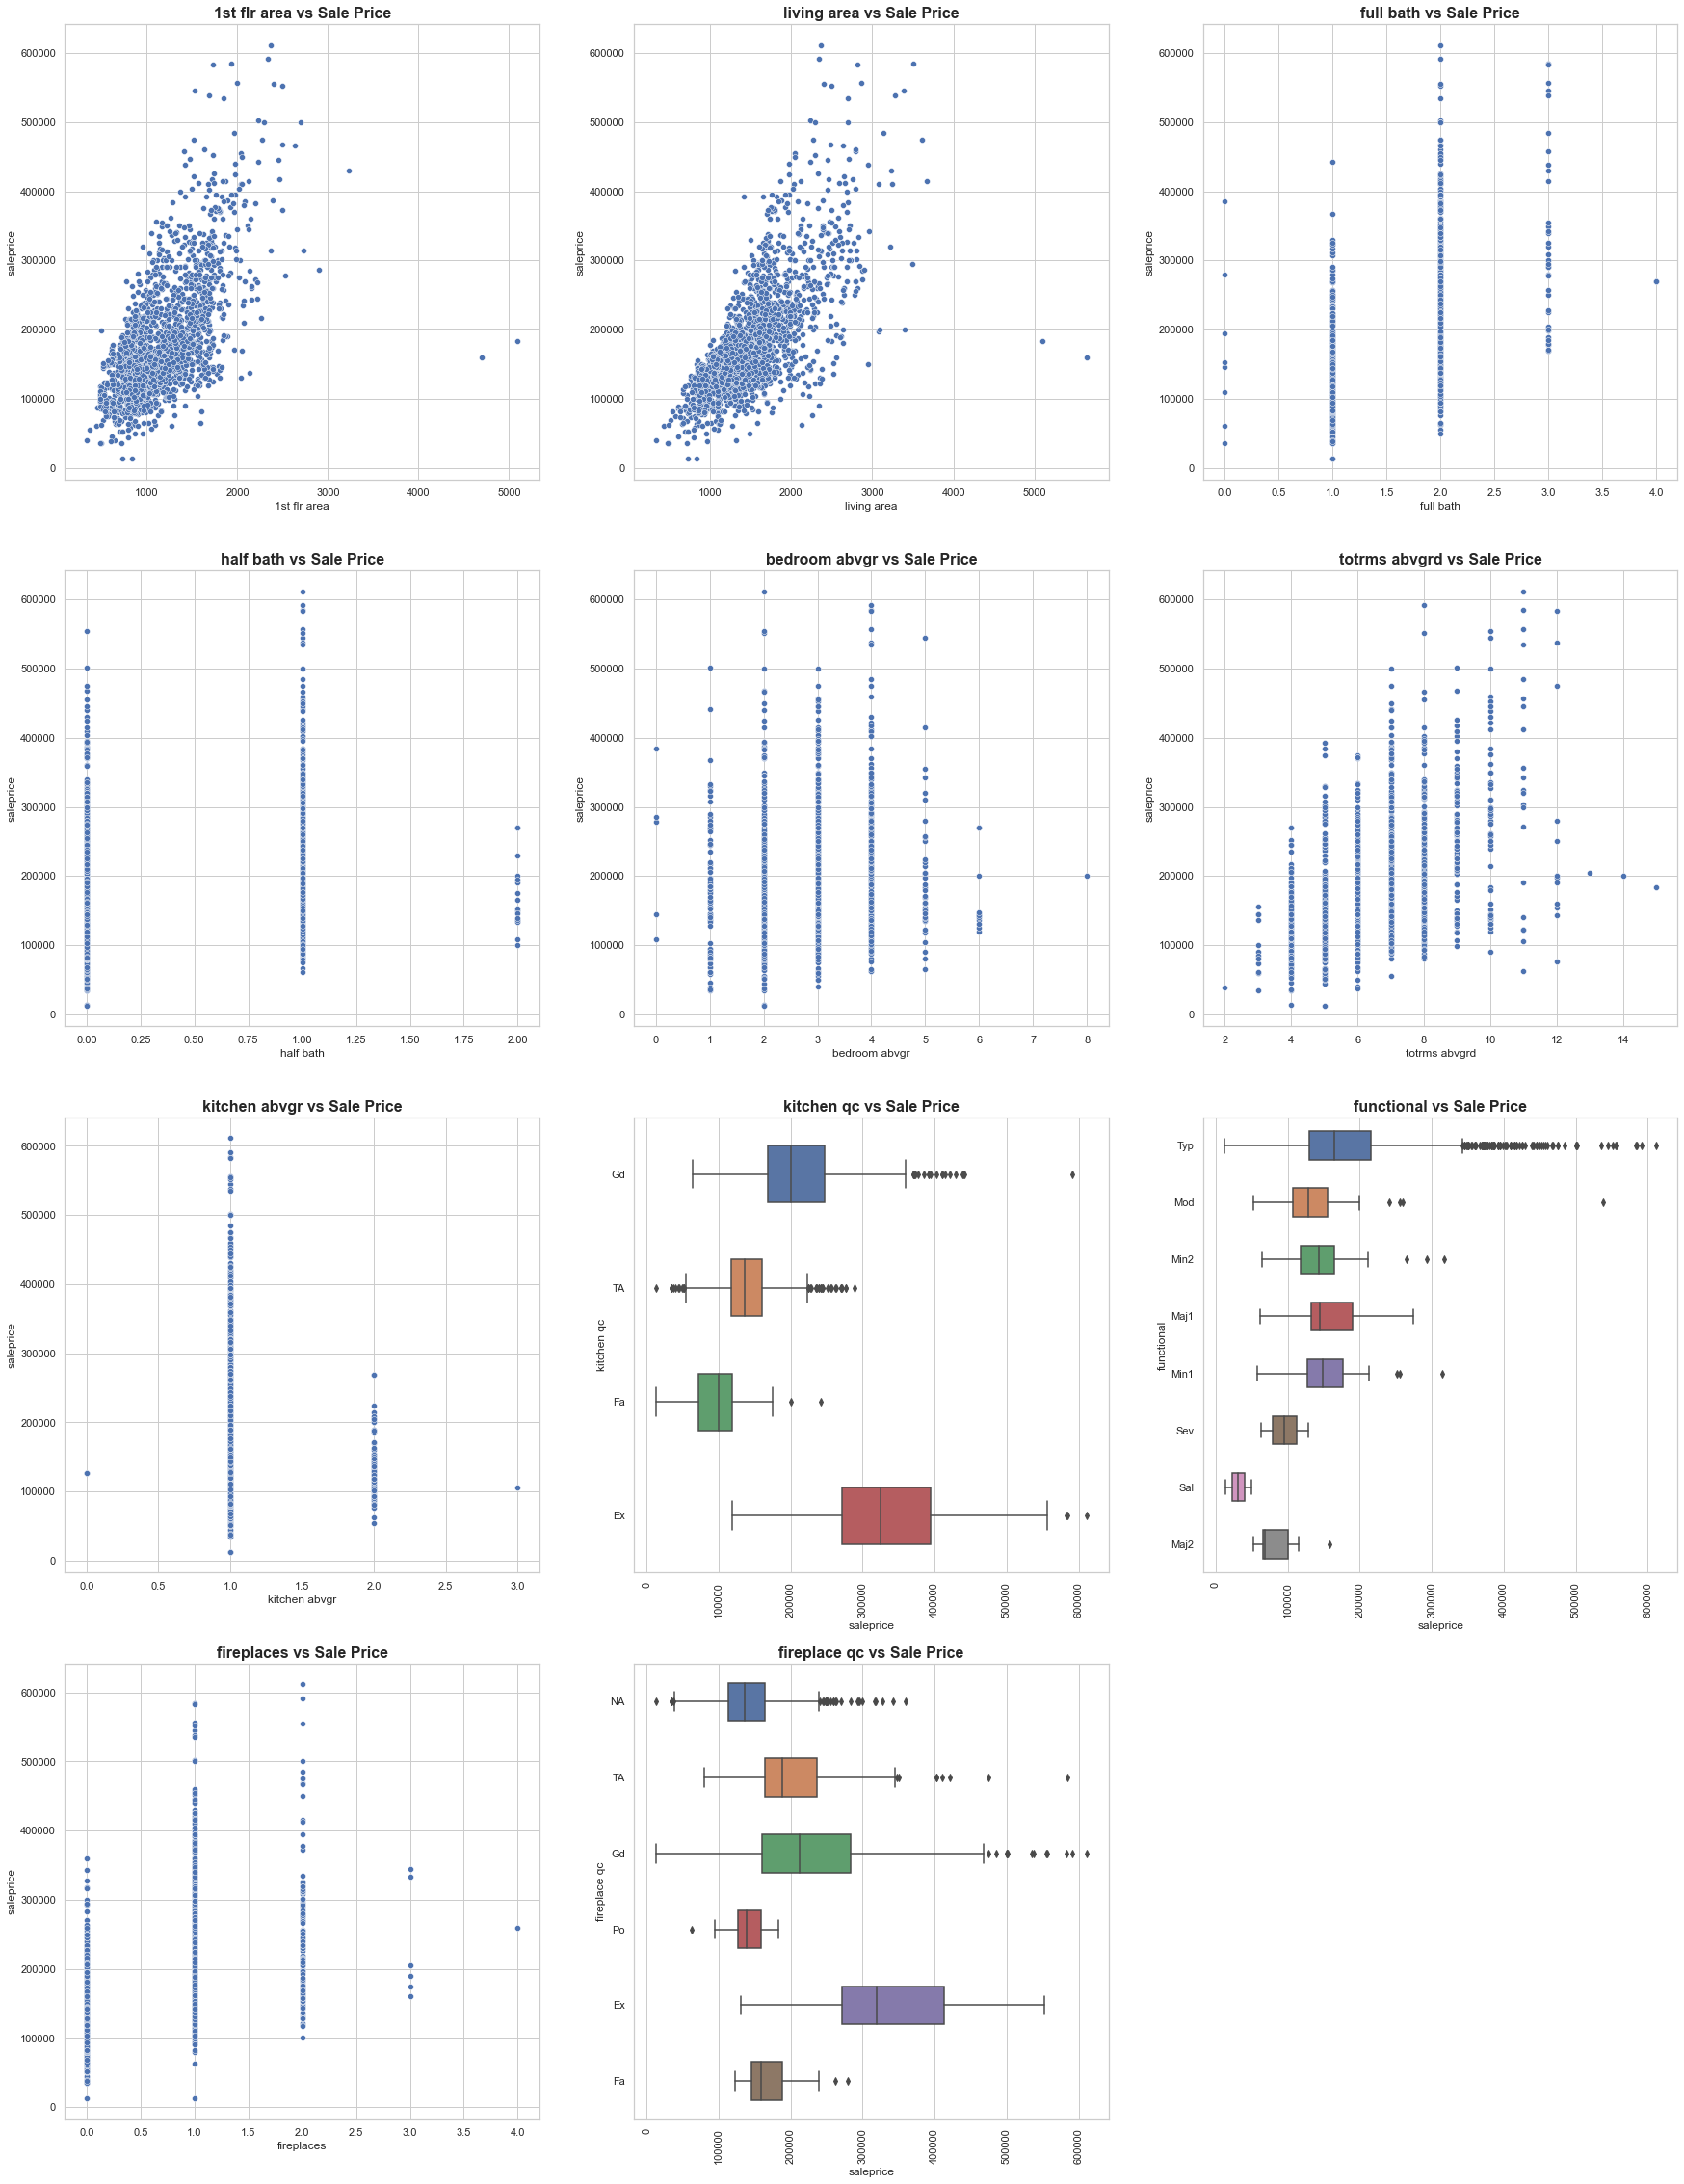

In [190]:
# Create the house interior feature list and plot the visulization related to these features
house_interior_list = ['1st flr area',  'living area', 'full bath', 'half bath', 'bedroom abvgr', 
                       'totrms abvgrd' ,'kitchen abvgr', 'kitchen qc', 'functional', 'fireplaces', 'fireplace qc']
EDA_subplot(df_train, house_interior_list, 4, 3)

In [191]:
# Check the data that has living area > 5000
df_train[(df_train['living area'] > 5000)].transpose()

960                              1885
id                                    1499                             2181
pid                              908154235                        908154195
ms subclass           2-Story 1946 & Newer  1-Story 1946 & Newer All Styles
ms zoning                               RL                               RL
lot frontage                         313.0                            128.0
lot area                             63887                            39290
street                                Pave                             Pave
alley                                   NA                               NA
lot shape                              IR3                              IR1
land contour                           Bnk                              Bnk
utilities                           AllPub                           AllPub
lot config                          Corner                           Inside
land slope                             Gtl                              Gtl
neighborhood                       Edwards                          Edwards
cond 1                               Feedr                             Norm
cond 2                                Norm                             Norm
bldg type                             1Fam                             1Fam
house style                         2Story                           1Story
overall qc                              10                               10
overall cond                             5                                5
yr built                              2008                             2008
yr remod/add                          2008                             2009
roof style                             Hip                              Hip
roof matl                          ClyTile                          CompShg
exter 1st                           Stucco                          CemntBd
exter 2nd                           Stucco                          CmentBd
mas vnr type                         Stone                            Stone
exter qc                                Ex                               Ex
exter cond                              TA                               TA
foundation                           PConc                            PConc
bsmt qc                                 Ex                               Ex
bsmt cond                               TA                               TA
bsmt exposure                           Gd                               Gd
bsmtfin type 1                         GLQ                              GLQ
bsmtfin type 2                         Unf                              Unf
bsmt unf area                        466.0                           1085.0
total bsmt area                     6110.0                           5095.0
heating                               GasA                             GasA
heating qc                              Ex                               Ex
central air                              Y                                Y
electrical                           SBrkr                            SBrkr
1st flr area                          4692                             5095
living area                           5642                             5095
bsmt full bath                         2.0                              1.0
bsmt half bath                         0.0                              1.0
full bath                                2                                2
half bath                                1                                1
bedroom abvgr                            3                                2
kitchen abvgr                            1                                1
kitchen qc                              Ex                               Ex
totrms abvgrd                           12                               15
functional                             Typ                              Typ
fireplaces

In [192]:
# Check the data that has 3 kitchens
df_train[(df_train['kitchen abvgr'] == 3)].transpose()

1359
id                                     716
pid                              902325070
ms subclass           2-1/2 Story All Ages
ms zoning                               RM
lot frontage                          90.0
lot area                              8100
street                                Pave
alley                                   NA
lot shape                              Reg
land contour                           Lvl
utilities                           AllPub
lot config                          Corner
land slope                             Gtl
neighborhood                       OldTown
cond 1                                Norm
cond 2                                Norm
bldg type                             1Fam
house style                         2.5Unf
overall qc                               5
overall cond                             5
yr built                              1898
yr remod/add                          1965
roof style                             Hip
roof matl                          CompShg
exter 1st                          AsbShng
exter 2nd                          AsbShng
mas vnr type                          None
exter qc                                TA
exter cond                              TA
foundation                           PConc
bsmt qc                                 TA
bsmt cond                               TA
bsmt exposure                           No
bsmtfin type 1                         Unf
bsmtfin type 2                         Unf
bsmt unf area                        849.0
total bsmt area                      849.0
heating                               GasA
heating qc                              TA
central air                              N
electrical                           FuseA
1st flr area                          1075
living area                           2138
bsmt full bath                         0.0
bsmt half bath                         0.0
full bath                                2
half bath                                0
bedroom abvgr                            2
kitchen abvgr                            3
kitchen qc                              TA
totrms abvgrd                           11
functional                             Typ
fireplaces                               0
fireplace qc                            NA
garage type                         Detchd
garage yr blt                       1910.0
garage finish                          Unf
garage cars                            2.0
garage area                          360.0
garage qc                               Fa
garage cond                             Po
paved drive                              N
pool qc                                 NA
fence                                MnPrv
misc feature                            NA
mo sold                                 11
yr sold                               2009
sale type                              WD 
saleprice                           106000
log saleprice                    11.571194
neighborhood cluster                     4

In [193]:
# Check the data that has 0 kitchen
df_train[(df_train['kitchen abvgr'] == 0)].transpose()

1137  \
id                                            2821   
pid                                      908103320   
ms subclass           Duplex - All Styles And Ages   
ms zoning                                       RL   
lot frontage                                  35.0   
lot area                                      9400   
street                                        Pave   
alley                                           NA   
lot shape                                      IR1   
land contour                                   Lvl   
utilities                                   AllPub   
lot config                                 CulDSac   
land slope                                     Gtl   
neighborhood                               Edwards   
cond 1                                        Norm   
cond 2                                        Norm   
bldg type                                   Duplex   
house style                                 SFoyer   
overall qc                                       6   
overall cond                                     5   
yr built                                      1975   
yr remod/add                                  1975   
roof style                                    Flat   
roof matl                                  Tar&Grv   
exter 1st                                  WdShing   
exter 2nd                                  Plywood   
mas vnr type                               BrkFace   
exter qc                                        TA   
exter cond                                      TA   
foundation                                  CBlock   
bsmt qc                                         Gd   
bsmt cond                                       Gd   
bsmt exposure                                   Gd   
bsmtfin type 1                                 GLQ   
bsmtfin type 2                                 Unf   
bsmt unf area                                  0.0   
total bsmt area                              945.0   
heating                                       GasA   
heating qc                                      TA   
central air                                      Y   
electrical                                   SBrkr   
1st flr area                                   980   
living area                                    980   
bsmt full bath                                 0.0   
bsmt half bath                                 2.0   
full bath                                        2   
half bath                                        0   
bedroom abvgr                                    4   
kitchen abvgr                                    0   
kitchen qc                                      TA   
totrms abvgrd                                    4   
functional                                     Typ   
fireplaces                                       0   
fireplace qc                                    NA   
garage type                                     NA   
garage yr blt                                  0.0   
garage finish                                   NA   
garage cars                                    0.0   
garage area                                    0.0   
garage qc                                       NA   
garage cond                                     NA   
paved drive                                      Y   
pool qc                                         NA   
fence                                           NA   
misc feature                                    NA   
mo sold                                         10   
yr sold                                       2006   
sale type                                      WD    
saleprice                                   127500   
log saleprice                            11.755872   
neighborhood cluster                             4   

                                              1519  
id                                            2820  
pid                                      908103310 

In [194]:
# Check the living area by kitchens to see if the 3 data is abnormal
df_train.groupby(['kitchen abvgr'])['living area'].median()

kitchen abvgr
0     996.0
1    1432.0
2    1664.0
3    2138.0
Name: living area, dtype: float64

**House Interior Findings:**

- In general, a bigger house area has a higher sale price.
- More full bathrooms seem to increase the sale price.
- Houses that have kitchen with excellent quality can fetch a very good price.
- Houses that have fireplace with excellent quality can fetch a very good price.
- There are 2 outliers observed in the Living area. The area is abnormally large and we should consider to remove it.
- There is a house with 3 kitchens and two without kitchen. Although it seem odd to have 3 kitchens, the living area is larger than houses with 2 or 1 kitchens. Hence, we can consider to keep the data. For the house without kitchens, it seem odd to have a house without a kitchen. In addition, there is data for the Kitchen Quality. Hence, there is error in the 2 data and we should consider to remove it.

### 5.10 Basement related

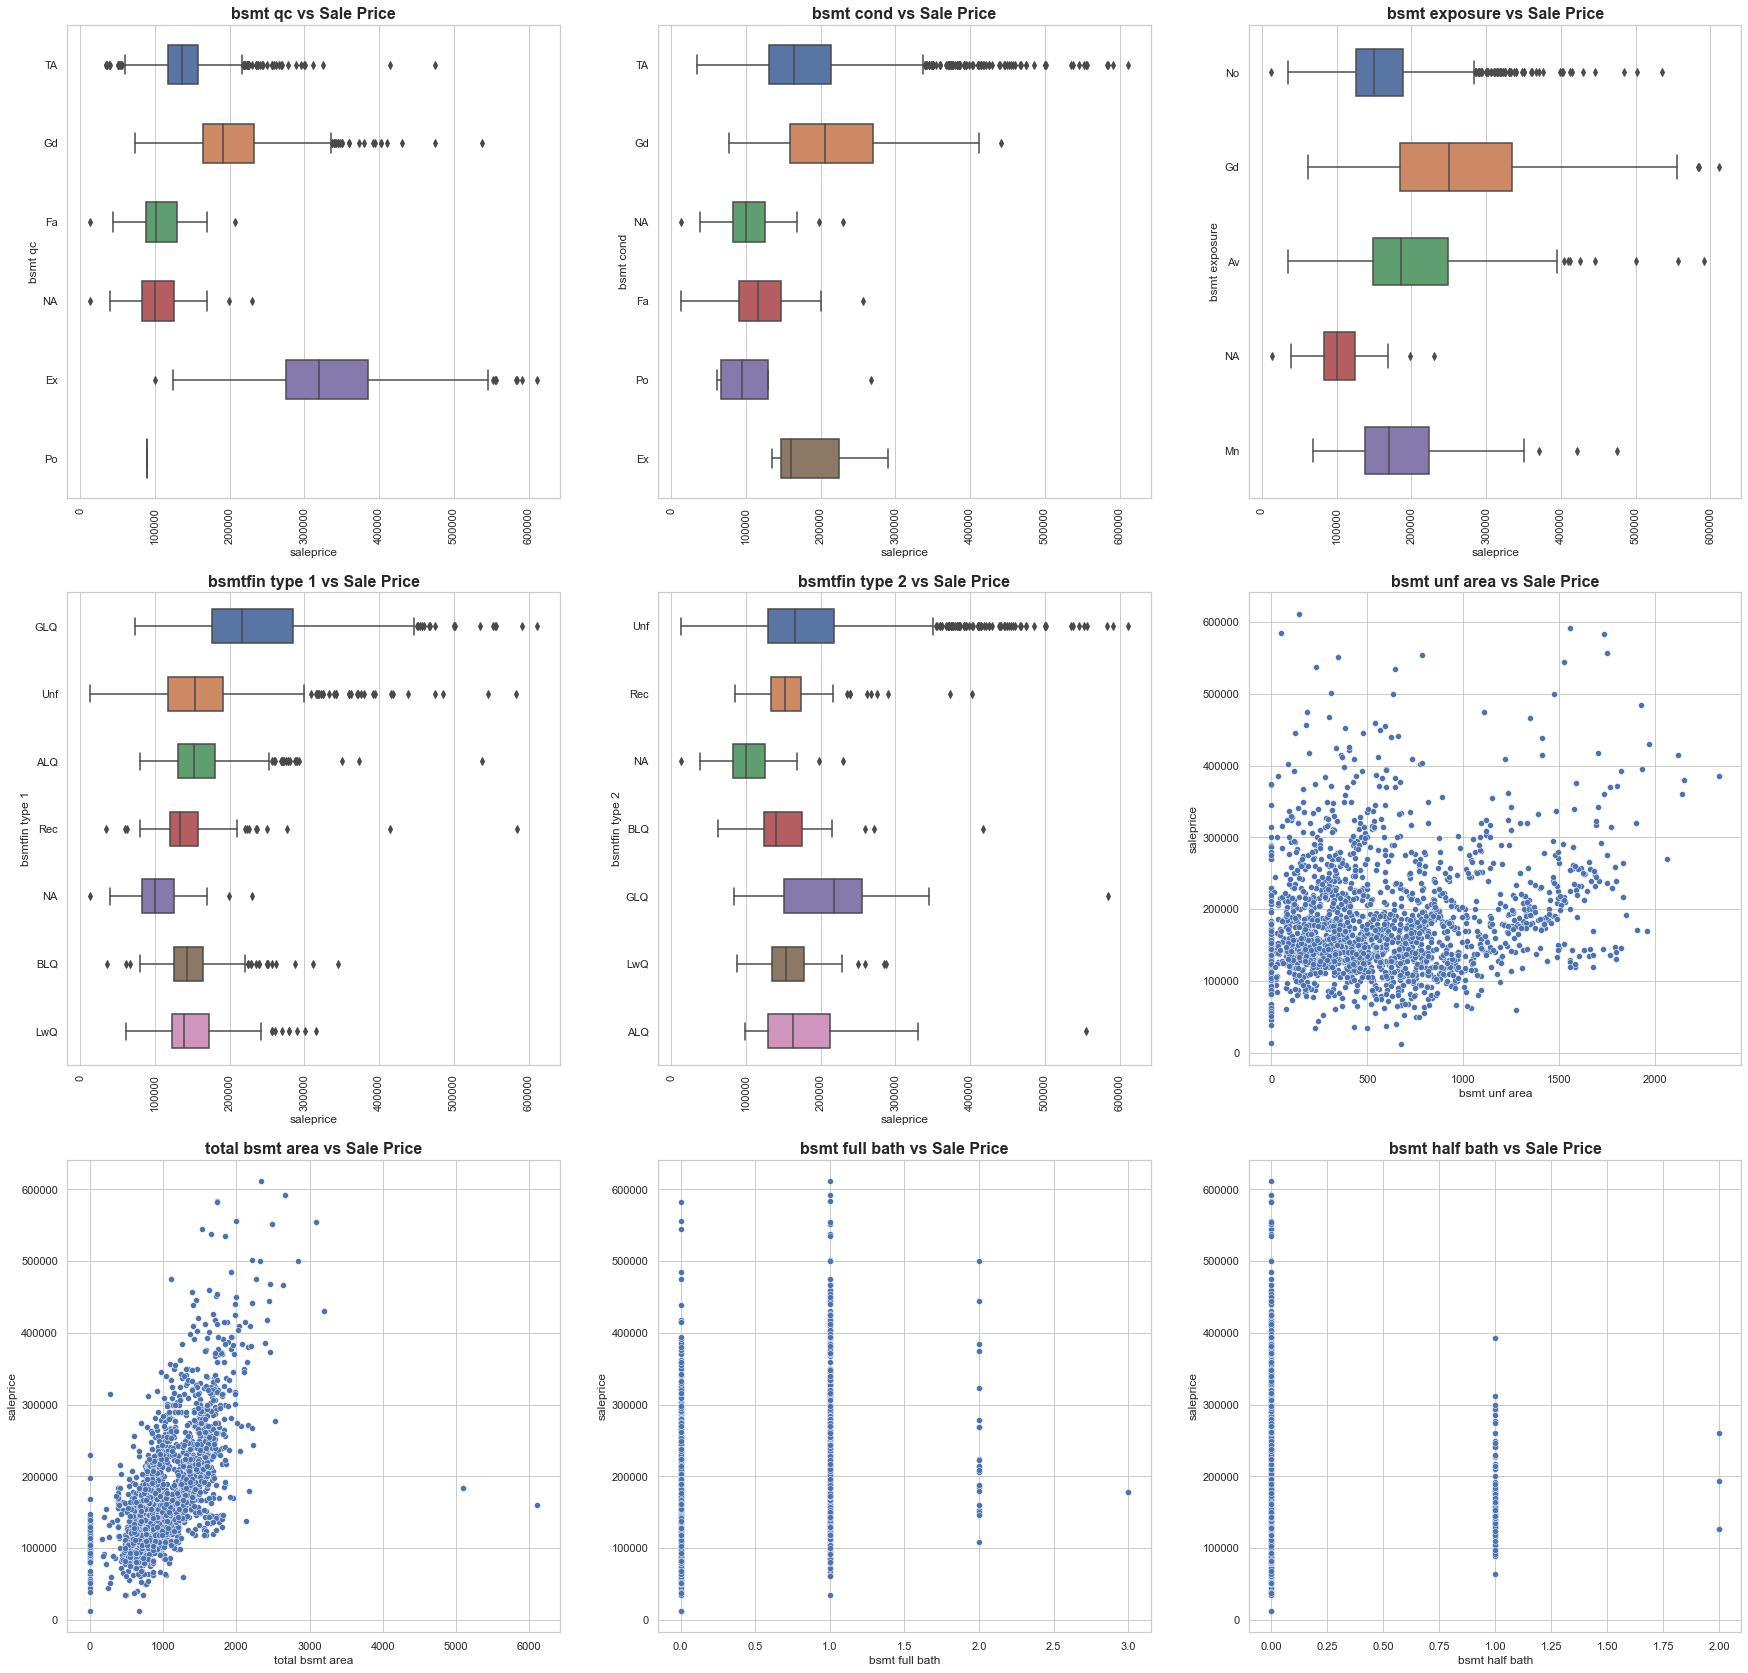

In [195]:
# Create the basement feature list and plot the visulization related to these features
basement_list = [bsmt for bsmt in df_train.columns if 'bsmt' in bsmt]
EDA_subplot(df_train, basement_list, 4, 3)

**Basement Related Findings:**

- A bigger, better quality and condition basement increases the house sale price.
- House that has better walkout or garden level walls (i.e better basement exposure) seem to have a higher sale price.
- A bigger size basement has a higher sale price.
- A good living quarters (GLQ) for the rating of basement finished area seems to get a better sale pricing.
- Bathroom in basement does not seem to affect the house pricing.


### 5.11 Garage related

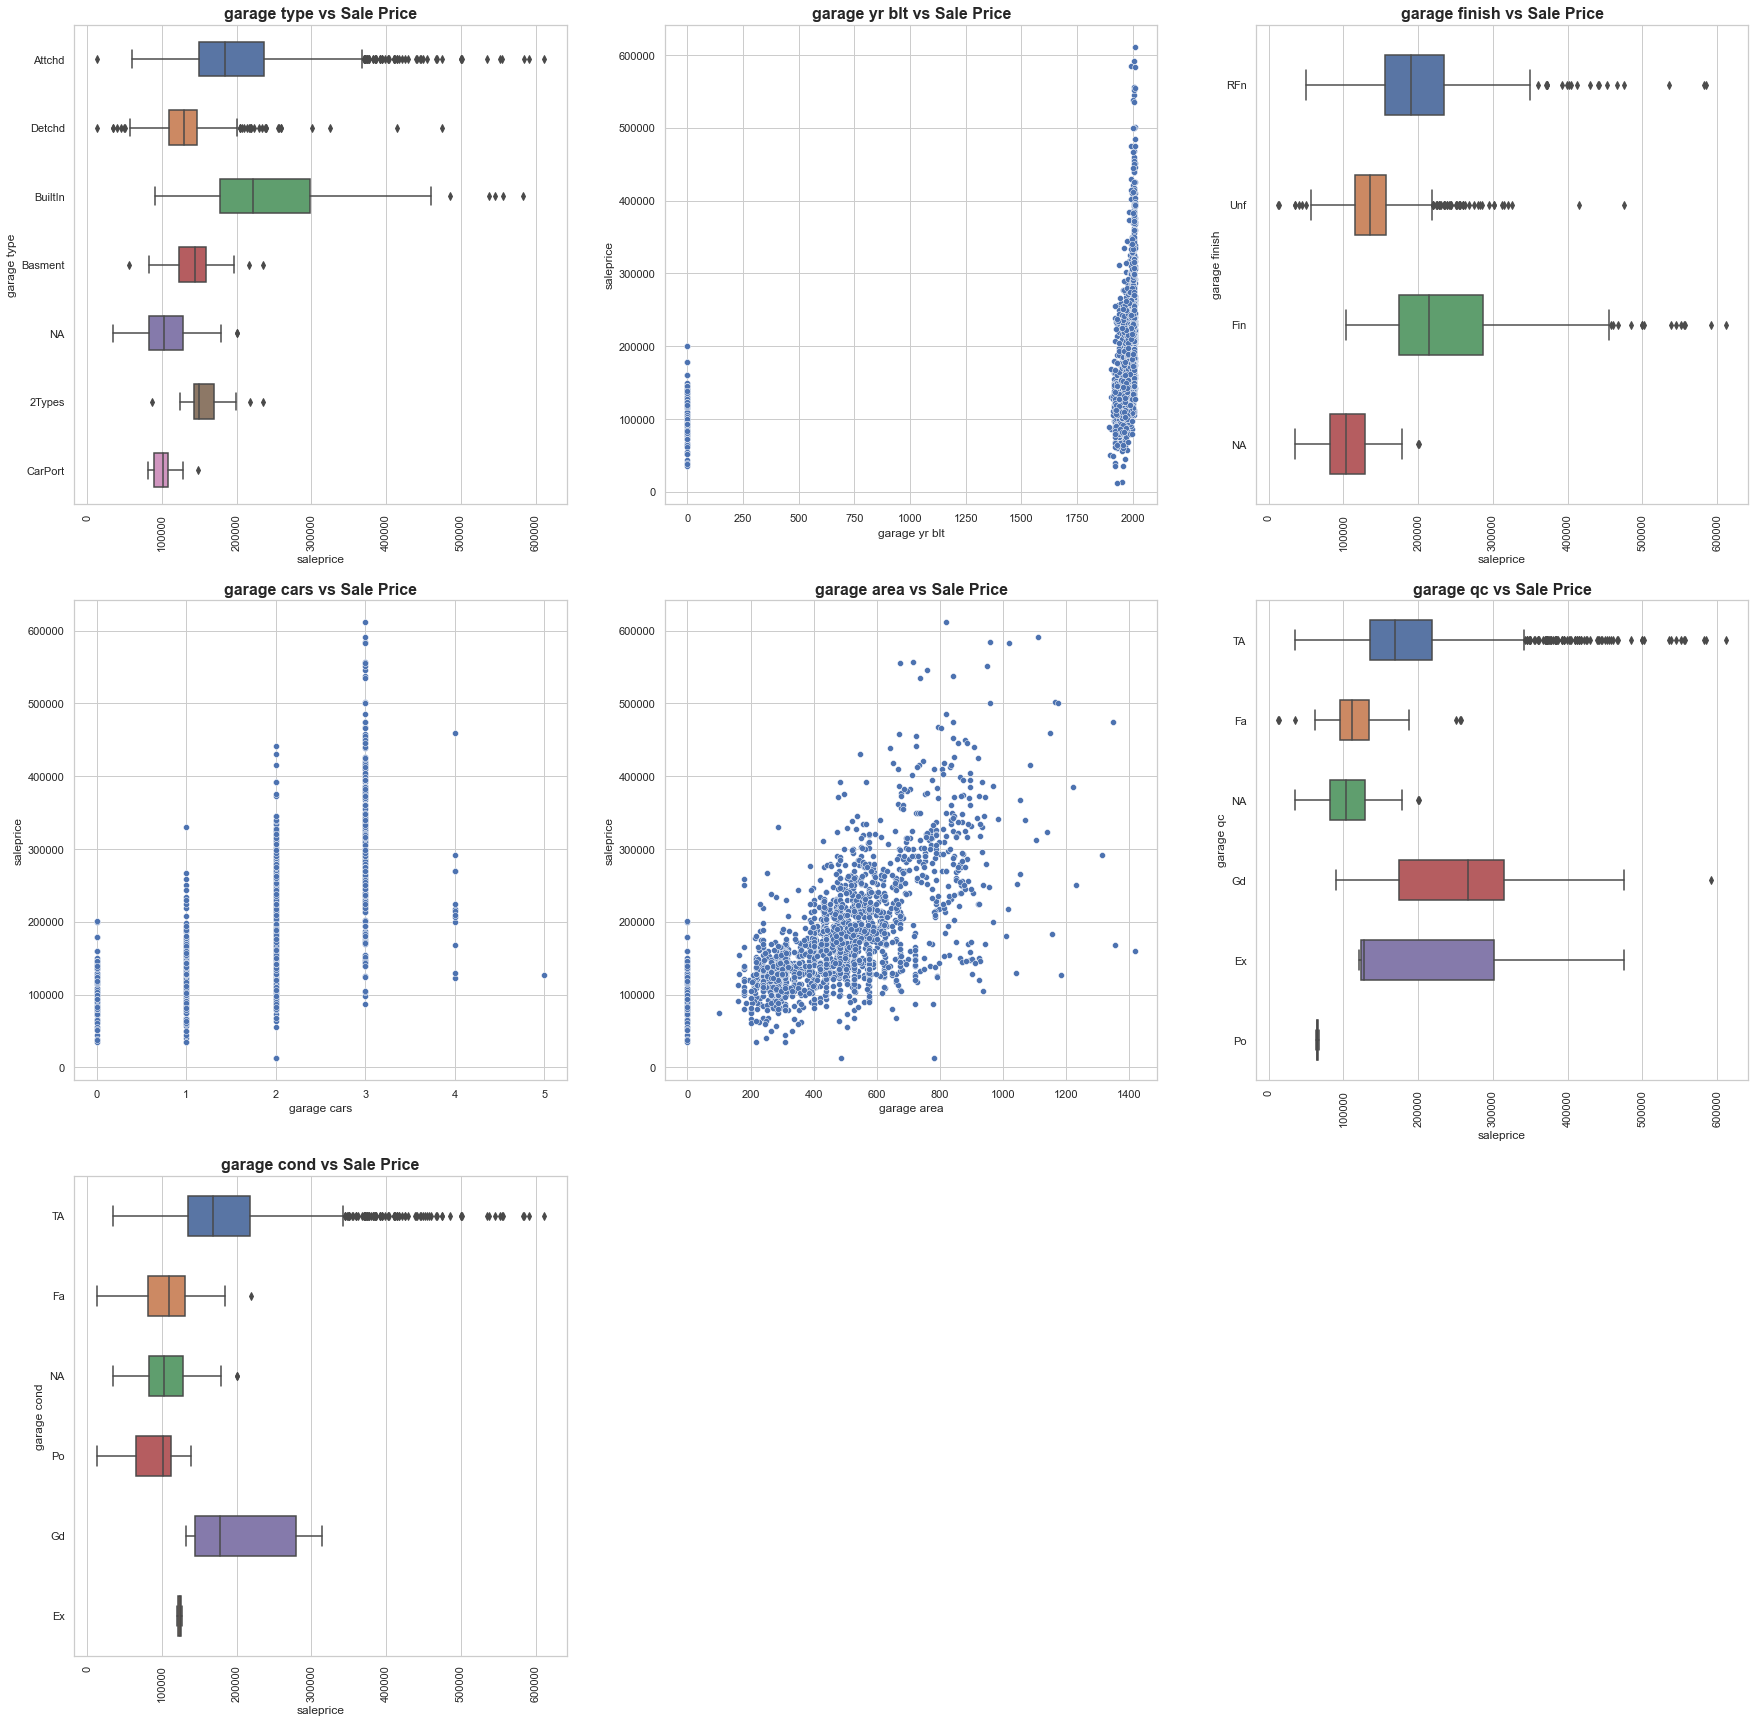

In [196]:
# Create the garage feature list and plot the visulization related to these features
garage_list = [garage for garage in df_train.columns if 'garage' in garage]
EDA_subplot(df_train, garage_list, 3, 3)

**Garage Related Findings:**

- Houses with built-in garge (BuiltIn) seems to have a better pricing. 
- A bigger and better quality and condition garage increases the house sale price.
- A higher capcity garage seem to increase the house pricing.

### 5.12 Utilities related

In [197]:
# Create the utilities feature list (e.g. heating, electrical, air-con etc) and plot the visulization related to these features
utilities_list = ['utilities', 'heating', 'heating qc', 'central air', 'electrical']
EDA_subplot(df_train, utilities_list, 2, 3)

**Utilities Related Findings:**

- Majority of the houses have the 'All public Utilities (E,G,W,& S)' category.
- Houses with gravity furnace (Grav) were sold at a lower price. 
- Houses with poor Heating QC (Po) were sold at a lower price.
- Houses with central air conditioning (Y) were sold at a lower price.
- For Electrical, houses with Standard Circuit Breakers & Romex (SBrkr) were sold at a higher price.

### 5.13 Pool related

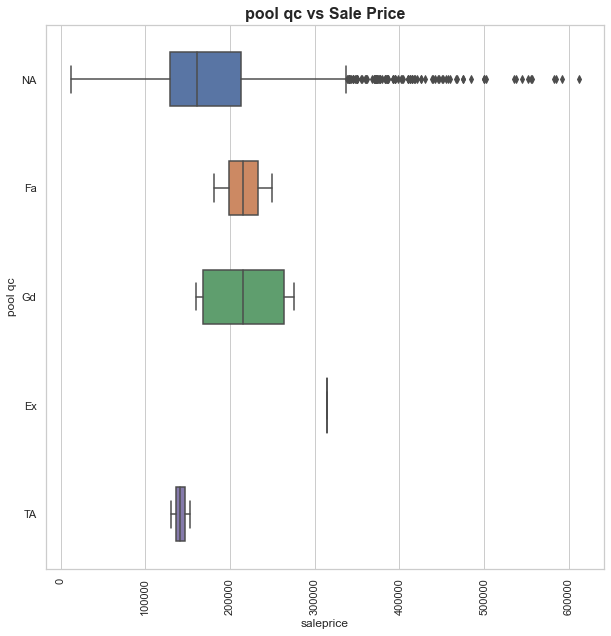

In [198]:
# Create the pool related feature list and plot the visulization related to these features
pool_list = ['pool qc']
EDA_subplot(df_train, pool_list, 1, 1)

**Pool Related Findings:**

- No significant relation for houses with pool.

### 5.14 Miscellaneous

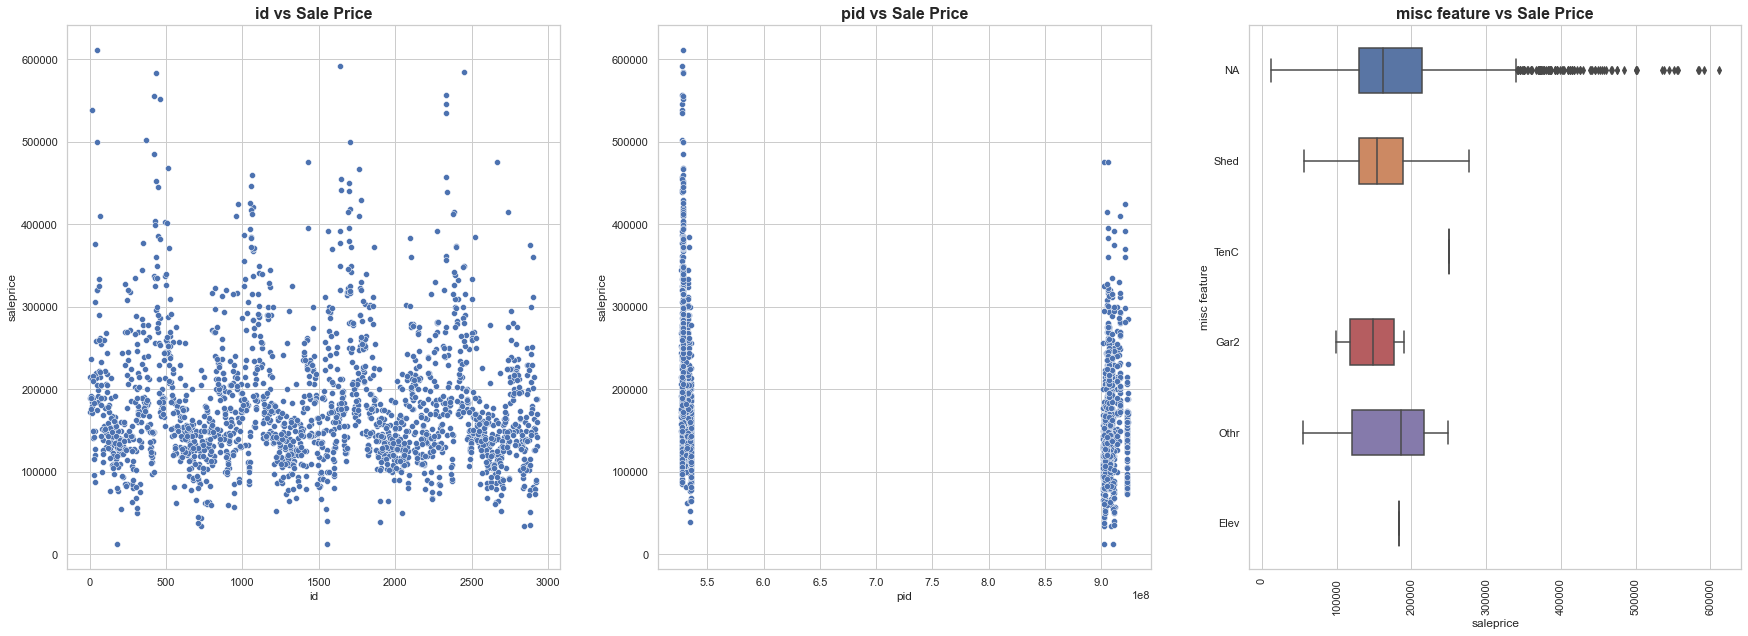

In [199]:
# Create the miscellaneous related feature list and plot the visulization related to these features
misc_list = ['id', 'pid', 'misc feature']
EDA_subplot(df_train, misc_list, 1, 3)

**Miscellaneous Related Findings:**

- No significant relation for miscellaneous related features.
- For the PID (Parcel identification number), the number either starts with '5' or '9'.

### 5.15 Sale related

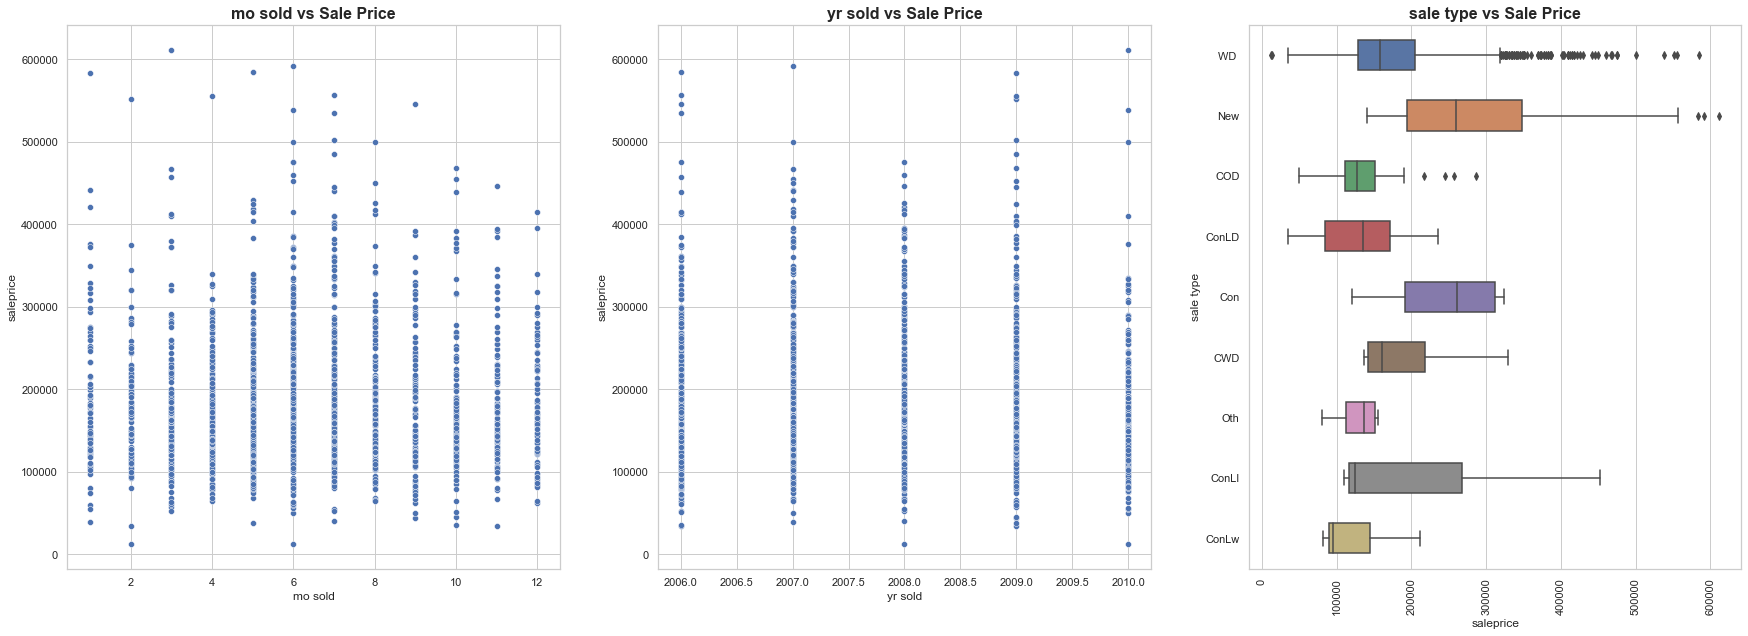

In [200]:
# Create the sale related feature list and plot the visulization related to these features
sale_list = ['mo sold', 'yr sold', 'sale type']
EDA_subplot(df_train, sale_list, 1, 3)

**Sale Related Findings:**

- No significant relation observed for the month and year.
- Houses just constructed and sold (New) fetch a better price while houses under Contract Low Down payment and low interest (ConLw) has a lower sale price.

### 5.16 Age

In [201]:
# Create a new column for age of the house at the point of sale
df_train['age'] = df_train['yr sold'] - df_train['yr built']

In [202]:
df_train.head()

id        pid                      ms subclass ms zoning  lot frontage  \
0  109  533352170             2-Story 1946 & Newer        RL          68.0   
1  544  531379050             2-Story 1946 & Newer        RL          43.0   
2  153  535304180  1-Story 1946 & Newer All Styles        RL          68.0   
3  318  916386060             2-Story 1946 & Newer        RL          73.0   
4  255  906425045    1-1/2 Story Finished All Ages        RL          82.0   

   lot area street alley lot shape land contour utilities lot config  \
0     13517   Pave    NA       IR1          Lvl    AllPub    CulDSac   
1     11492   Pave    NA       IR1          Lvl    AllPub    CulDSac   
2      7922   Pave    NA       Reg          Lvl    AllPub     Inside   
3      9802   Pave    NA       Reg          Lvl    AllPub     Inside   
4     14235   Pave    NA       IR1          Lvl    AllPub     Inside   

  land slope neighborhood cond 1 cond 2 bldg type house style  overall qc  \
0        Gtl       Sawyer   RRAe   Norm      1Fam      2Story           6   
1        Gtl      SawyerW   Norm   Norm      1Fam      2Story           7   
2        Gtl        NAmes   Norm   Norm      1Fam      1Story           5   
3        Gtl       Timber   Norm   Norm      1Fam      2Story           5   
4        Gtl      SawyerW   Norm   Norm      1Fam      1.5Fin           6   

   overall cond  yr built  yr remod/add roof style roof matl exter 1st  \
0             8      1976          2005      Gable   CompShg   HdBoard   
1             5      1996          1997      Gable   CompShg   VinylSd   
2             7      1953          2007      Gable   CompShg   VinylSd   
3             5      2006          2007      Gable   CompShg   VinylSd   
4             8      1900          1993      Gable   CompShg   Wd Sdng   

  exter 2nd mas vnr type exter qc exter cond foundation bsmt qc bsmt cond  \
0   Plywood      BrkFace       Gd         TA     CBlock      TA        TA   
1   VinylSd      BrkFace       Gd         TA      PConc      Gd        TA   
2   VinylSd         None       TA         Gd     CBlock      TA        TA   
3   VinylSd         None       TA         TA      PConc      Gd        TA   
4   Plywood         None       TA         TA      PConc      Fa        Gd   

  bsmt exposure bsmtfin type 1 bsmtfin type 2  bsmt unf area  total bsmt area  \
0            No            GLQ            Unf          192.0            725.0   
1            No            GLQ            Unf          276.0            913.0   
2            No            GLQ            Unf          326.0           1057.0   
3            No            Unf            Unf          384.0            384.0   
4            No            Unf            Unf          676.0            676.0   

  heating heating qc central air electrical  1st flr area  living area  \
0    GasA         Ex           Y      SBrkr           725         1479   
1    GasA         Ex           Y      SBrkr           913         2122   
2    GasA         TA           Y      SBrkr          1057         1057   
3    GasA         Gd           Y      SBrkr           744         1444   
4    GasA         TA           Y      SBrkr           831         1445   

   bsmt full bath  bsmt half bath  full bath  half bath  bedroom abvgr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2          1              3   
4             0.0             0.0          2          0              3   

   kitchen abvgr kitchen qc  totrms abvgrd functional  fireplaces  \
0              1         Gd              6        Typ           0   
1              1         Gd              8        Typ           1   
2              1         Gd              5        Typ           0   
3              1         TA              7        Typ           0   
4        

Text(0.5, 1.0, 'Age of House vs Sale Price')

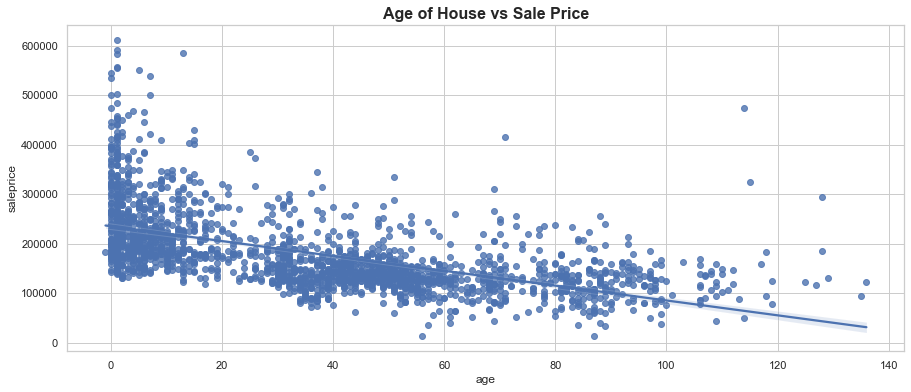

In [203]:
# Plot the scatterplot on age vs sale price
plt.subplots(figsize=(15,6))

sns.regplot(data = df_train, x = 'age', y = 'saleprice')
plt.title(f'Age of House vs Sale Price', loc = 'center', fontsize = 16, fontweight = 'bold')

- We can see a negative correlation where newer houses have a higher sale price.

### 5.17 Total Area

From the above visualizations, there seems to be a positive correlation in the area features (Living, Basement, Garage). We will add in a total area (in sq feet) and see if the correlation is stronger.

In [204]:
# Create a new column for the total area and sum up the basement, living and gargae area for df_train
df_train['total area'] = df_train['total bsmt area'] + df_train['living area'] + df_train['garage area']

In [205]:
df_train.head()

id        pid                      ms subclass ms zoning  lot frontage  \
0  109  533352170             2-Story 1946 & Newer        RL          68.0   
1  544  531379050             2-Story 1946 & Newer        RL          43.0   
2  153  535304180  1-Story 1946 & Newer All Styles        RL          68.0   
3  318  916386060             2-Story 1946 & Newer        RL          73.0   
4  255  906425045    1-1/2 Story Finished All Ages        RL          82.0   

   lot area street alley lot shape land contour utilities lot config  \
0     13517   Pave    NA       IR1          Lvl    AllPub    CulDSac   
1     11492   Pave    NA       IR1          Lvl    AllPub    CulDSac   
2      7922   Pave    NA       Reg          Lvl    AllPub     Inside   
3      9802   Pave    NA       Reg          Lvl    AllPub     Inside   
4     14235   Pave    NA       IR1          Lvl    AllPub     Inside   

  land slope neighborhood cond 1 cond 2 bldg type house style  overall qc  \
0        Gtl       Sawyer   RRAe   Norm      1Fam      2Story           6   
1        Gtl      SawyerW   Norm   Norm      1Fam      2Story           7   
2        Gtl        NAmes   Norm   Norm      1Fam      1Story           5   
3        Gtl       Timber   Norm   Norm      1Fam      2Story           5   
4        Gtl      SawyerW   Norm   Norm      1Fam      1.5Fin           6   

   overall cond  yr built  yr remod/add roof style roof matl exter 1st  \
0             8      1976          2005      Gable   CompShg   HdBoard   
1             5      1996          1997      Gable   CompShg   VinylSd   
2             7      1953          2007      Gable   CompShg   VinylSd   
3             5      2006          2007      Gable   CompShg   VinylSd   
4             8      1900          1993      Gable   CompShg   Wd Sdng   

  exter 2nd mas vnr type exter qc exter cond foundation bsmt qc bsmt cond  \
0   Plywood      BrkFace       Gd         TA     CBlock      TA        TA   
1   VinylSd      BrkFace       Gd         TA      PConc      Gd        TA   
2   VinylSd         None       TA         Gd     CBlock      TA        TA   
3   VinylSd         None       TA         TA      PConc      Gd        TA   
4   Plywood         None       TA         TA      PConc      Fa        Gd   

  bsmt exposure bsmtfin type 1 bsmtfin type 2  bsmt unf area  total bsmt area  \
0            No            GLQ            Unf          192.0            725.0   
1            No            GLQ            Unf          276.0            913.0   
2            No            GLQ            Unf          326.0           1057.0   
3            No            Unf            Unf          384.0            384.0   
4            No            Unf            Unf          676.0            676.0   

  heating heating qc central air electrical  1st flr area  living area  \
0    GasA         Ex           Y      SBrkr           725         1479   
1    GasA         Ex           Y      SBrkr           913         2122   
2    GasA         TA           Y      SBrkr          1057         1057   
3    GasA         Gd           Y      SBrkr           744         1444   
4    GasA         TA           Y      SBrkr           831         1445   

   bsmt full bath  bsmt half bath  full bath  half bath  bedroom abvgr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2          1              3   
4             0.0             0.0          2          0              3   

   kitchen abvgr kitchen qc  totrms abvgrd functional  fireplaces  \
0              1         Gd              6        Typ           0   
1              1         Gd              8        Typ           1   
2              1         Gd              5        Typ           0   
3              1         TA              7        Typ           0   
4        

In [206]:
# Plot the scatterplot on total area vs sale price
plt.subplots(figsize=(15,6))

sns.regplot(data = df_train, x = 'total area', y = 'saleprice')
plt.title(f'Total Area vs Sale Price', loc = 'center', fontsize = 16, fontweight = 'bold')

Text(0.5, 1.0, 'Total Area vs Sale Price')

In [207]:
df_train[(df_train['total area'] > 10000)].transpose()

960                              1885
id                                    1499                             2181
pid                              908154235                        908154195
ms subclass           2-Story 1946 & Newer  1-Story 1946 & Newer All Styles
ms zoning                               RL                               RL
lot frontage                         313.0                            128.0
lot area                             63887                            39290
street                                Pave                             Pave
alley                                   NA                               NA
lot shape                              IR3                              IR1
land contour                           Bnk                              Bnk
utilities                           AllPub                           AllPub
lot config                          Corner                           Inside
land slope                             Gtl                              Gtl
neighborhood                       Edwards                          Edwards
cond 1                               Feedr                             Norm
cond 2                                Norm                             Norm
bldg type                             1Fam                             1Fam
house style                         2Story                           1Story
overall qc                              10                               10
overall cond                             5                                5
yr built                              2008                             2008
yr remod/add                          2008                             2009
roof style                             Hip                              Hip
roof matl                          ClyTile                          CompShg
exter 1st                           Stucco                          CemntBd
exter 2nd                           Stucco                          CmentBd
mas vnr type                         Stone                            Stone
exter qc                                Ex                               Ex
exter cond                              TA                               TA
foundation                           PConc                            PConc
bsmt qc                                 Ex                               Ex
bsmt cond                               TA                               TA
bsmt exposure                           Gd                               Gd
bsmtfin type 1                         GLQ                              GLQ
bsmtfin type 2                         Unf                              Unf
bsmt unf area                        466.0                           1085.0
total bsmt area                     6110.0                           5095.0
heating                               GasA                             GasA
heating qc                              Ex                               Ex
central air                              Y                                Y
electrical                           SBrkr                            SBrkr
1st flr area                          4692                             5095
living area                           5642                             5095
bsmt full bath                         2.0                              1.0
bsmt half bath                         0.0                              1.0
full bath                                2                                2
half bath                                1                                1
bedroom abvgr                            3                                2
kitchen abvgr                            1                                1
kitchen qc                              Ex                               Ex
totrms abvgrd                           12                               15
functional                             Typ                              Typ
fireplaces

- We can see the correlation is stronger. There are 2 outliers observed. These 2 outliers are the same outliers identified earlier on (in Section 5.9).

In [208]:
# Create the Age and Total Area columns for df_test
df_test['age'] = df_test['yr sold'] - df_test['yr built']
df_test['total area'] = df_test['total bsmt area'] + df_test['living area'] + df_test['garage area']

In [209]:
df_test.head()

id        pid  ms subclass ms zoning  lot frontage  lot area street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL          68.0      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL          68.0      9500   Pave   

  alley lot shape land contour utilities lot config land slope neighborhood  \
0  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1    NA       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2    NA       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3    NA       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4    NA       IR1          Lvl    AllPub     Inside        Gtl        NAmes   

  cond 1 cond 2 bldg type house style  overall qc  overall cond  yr built  \
0   Norm   Norm    2fmCon      2Story           6             8      1910   
1   Norm   Norm    Duplex      1Story           5             4      1977   
2   Norm   Norm      1Fam      2Story           7             5      2006   
3   Norm   Norm      1Fam      1Story           5             6      1923   
4   Norm   Norm      1Fam      1Story           6             5      1963   

   yr remod/add roof style roof matl exter 1st exter 2nd mas vnr type  \
0          1950      Gable   CompShg   AsbShng   AsbShng         None   
1          1977      Gable   CompShg   Plywood   Plywood         None   
2          2006      Gable   CompShg   VinylSd   VinylSd         None   
3          2006      Gable   CompShg   Wd Sdng   Wd Sdng         None   
4          1963      Gable   CompShg   Plywood   Plywood      BrkFace   

  exter qc exter cond foundation bsmt qc bsmt cond bsmt exposure  \
0       TA         Fa      Stone      Fa        TA            No   
1       TA         TA     CBlock      Gd        TA            No   
2       Gd         TA      PConc      Gd        Gd            Av   
3       Gd         TA     CBlock      TA        TA            No   
4       TA         TA     CBlock      Gd        TA            No   

  bsmtfin type 1 bsmtfin type 2  bsmt unf area  total bsmt area heating  \
0            Unf            Unf           1020             1020    GasA   
1            Unf            Unf           1967             1967    GasA   
2            GLQ            Unf            100              654    GasA   
3            Unf            Unf            968              968    GasA   
4            BLQ            Unf            785             1394    GasA   

  heating qc central air electrical  1st flr area  living area  \
0         Gd           N      FuseP           908         1928   
1         TA           Y      SBrkr          1967         1967   
2         Ex           Y      SBrkr           664         1496   
3         TA           Y      SBrkr           968          968   
4         Gd           Y      SBrkr          1394         1394   

   bsmt full bath  bsmt half bath  full bath  half bath  bedroom abvgr  \
0               0               0          2          0              4   
1               0               0          2          0              6   
2               1               0          2          1              3   
3               0               0          1          0              2   
4               1               0          1          1              3   

   kitchen abvgr kitchen qc  totrms abvgrd functional  fireplaces  \
0              2         Fa              9        Typ           0   
1              2         TA             10        Typ           0   
2              1         Gd              7        Typ           1   
3              1         TA              5        Typ           0   
4              1         TA              6        Typ           2   

  fireplace qc garage type  garage yr blt garage finis

### 5.18 Finding outliers

We observed there seem to be 2 outliers observed in some of the plots and quite significant in the Living Area and 1st Flr Area. 

Text(0.5, 1.0, 'Sales Price vs 1st Flr SF')

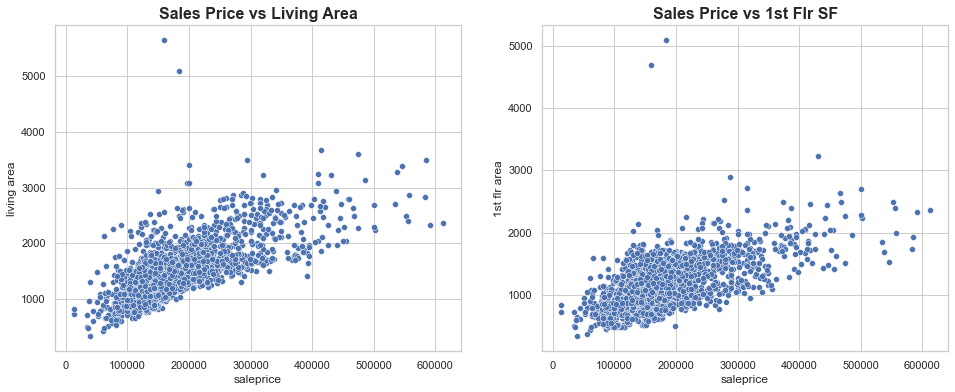

In [210]:
# Plot scatterplot to check Sale Price vs Gr Liv Area and 1st Fl SF
plt.subplots(figsize=(16,6))

plt.subplot(121)
sns.scatterplot(data=df_train, x='saleprice', y='living area')
plt.title('Sales Price vs Living Area', loc='center', fontsize=16, fontweight='bold')

plt.subplot(122)
sns.scatterplot(data=df_train, x='saleprice', y='1st flr area')
plt.title('Sales Price vs 1st Flr SF', loc='center', fontsize=16, fontweight='bold')

In [211]:
df_train[df_train['living area']>4000].transpose()

960                              1885
id                                    1499                             2181
pid                              908154235                        908154195
ms subclass           2-Story 1946 & Newer  1-Story 1946 & Newer All Styles
ms zoning                               RL                               RL
lot frontage                         313.0                            128.0
lot area                             63887                            39290
street                                Pave                             Pave
alley                                   NA                               NA
lot shape                              IR3                              IR1
land contour                           Bnk                              Bnk
utilities                           AllPub                           AllPub
lot config                          Corner                           Inside
land slope                             Gtl                              Gtl
neighborhood                       Edwards                          Edwards
cond 1                               Feedr                             Norm
cond 2                                Norm                             Norm
bldg type                             1Fam                             1Fam
house style                         2Story                           1Story
overall qc                              10                               10
overall cond                             5                                5
yr built                              2008                             2008
yr remod/add                          2008                             2009
roof style                             Hip                              Hip
roof matl                          ClyTile                          CompShg
exter 1st                           Stucco                          CemntBd
exter 2nd                           Stucco                          CmentBd
mas vnr type                         Stone                            Stone
exter qc                                Ex                               Ex
exter cond                              TA                               TA
foundation                           PConc                            PConc
bsmt qc                                 Ex                               Ex
bsmt cond                               TA                               TA
bsmt exposure                           Gd                               Gd
bsmtfin type 1                         GLQ                              GLQ
bsmtfin type 2                         Unf                              Unf
bsmt unf area                        466.0                           1085.0
total bsmt area                     6110.0                           5095.0
heating                               GasA                             GasA
heating qc                              Ex                               Ex
central air                              Y                                Y
electrical                           SBrkr                            SBrkr
1st flr area                          4692                             5095
living area                           5642                             5095
bsmt full bath                         2.0                              1.0
bsmt half bath                         0.0                              1.0
full bath                                2                                2
half bath                                1                                1
bedroom abvgr                            3                                2
kitchen abvgr                            1                                1
kitchen qc                              Ex                               Ex
totrms abvgrd                           12                               15
functional                             Typ                              Typ
fireplaces

In [212]:
# Remove the outliers for living area and data error for no kitchen
df_train.drop([960, 1885, 1137, 1519], inplace=True)

In [213]:
df_train.shape

(2018, 73)

In [214]:
# Ensure outliers are dropped
df_train[df_train['living area']>4000]

Empty DataFrame
Columns: [id, pid, ms subclass, ms zoning, lot frontage, lot area, street, alley, lot shape, land contour, utilities, lot config, land slope, neighborhood, cond 1, cond 2, bldg type, house style, overall qc, overall cond, yr built, yr remod/add, roof style, roof matl, exter 1st, exter 2nd, mas vnr type, exter qc, exter cond, foundation, bsmt qc, bsmt cond, bsmt exposure, bsmtfin type 1, bsmtfin type 2, bsmt unf area, total bsmt area, heating, heating qc, central air, electrical, 1st flr area, living area, bsmt full bath, bsmt half bath, full bath, half bath, bedroom abvgr, kitchen abvgr, kitchen qc, totrms abvgrd, functional, fireplaces, fireplace qc, garage type, garage yr blt, garage finish, garage cars, garage area, garage qc, garage cond, paved drive, pool qc, fence, misc feature, mo sold, yr sold, sale type, saleprice, log saleprice, neighborhood cluster, age, total area]
Index: []

In [215]:
df_train[df_train['kitchen abvgr']==0]

Empty DataFrame
Columns: [id, pid, ms subclass, ms zoning, lot frontage, lot area, street, alley, lot shape, land contour, utilities, lot config, land slope, neighborhood, cond 1, cond 2, bldg type, house style, overall qc, overall cond, yr built, yr remod/add, roof style, roof matl, exter 1st, exter 2nd, mas vnr type, exter qc, exter cond, foundation, bsmt qc, bsmt cond, bsmt exposure, bsmtfin type 1, bsmtfin type 2, bsmt unf area, total bsmt area, heating, heating qc, central air, electrical, 1st flr area, living area, bsmt full bath, bsmt half bath, full bath, half bath, bedroom abvgr, kitchen abvgr, kitchen qc, totrms abvgrd, functional, fireplaces, fireplace qc, garage type, garage yr blt, garage finish, garage cars, garage area, garage qc, garage cond, paved drive, pool qc, fence, misc feature, mo sold, yr sold, sale type, saleprice, log saleprice, neighborhood cluster, age, total area]
Index: []

## 6. Correlation Matrix

In [216]:
# Convert ordinal variable to numerical for df_train
df_train['lot shape'].replace({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0}, inplace=True)
df_train['utilities'].replace({'AllPub': 3, 'NoSewr': 2, 'NoSeWa': 1, 'ELO': 0}, inplace=True)
df_train['land slope'].replace({'Gtl': 2, 'Mod': 1, 'Sev': 0}, inplace=True)
df_train['exter qc'].replace({'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 2}, inplace=True)
df_train['exter cond'].replace({'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 2}, inplace=True)
df_train['bsmt qc'].replace({'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 2, 'NA': 0}, inplace=True)
df_train['bsmt cond'].replace({'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 2, 'NA': 0}, inplace=True)
df_train['bsmt exposure'].replace({'Gd': 4, 'Av': 3, 'Mn': 2,'No': 1,'NA': 0}, inplace=True)
df_train['bsmtfin type 1'].replace({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}, inplace=True)
df_train['bsmtfin type 2'].replace({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}, inplace=True)
df_train['heating qc'].replace({'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 2}, inplace=True)
df_train['electrical'].replace({'SBrkr': 4, 'FuseA': 3, 'FuseF': 2, 'FuseP': 1, 'Mix': 0}, inplace=True)
df_train['kitchen qc'].replace({'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 2}, inplace=True)
df_train['functional'].replace({'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0}, inplace=True)
df_train['fireplace qc'].replace({'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 2, 'NA': 0}, inplace=True)
df_train['garage finish'].replace({'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0}, inplace=True)
df_train['garage qc'].replace({'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 2, 'NA': 0}, inplace=True)
df_train['garage cond'].replace({'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 2, 'NA': 0}, inplace=True)
df_train['paved drive'].replace({'Y': 2, 'P': 1, 'N': 0}, inplace=True)
df_train['pool qc'].replace({'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'NA': 0}, inplace=True)
df_train['fence'].replace({'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0}, inplace=True)
df_train['garage type'].replace({'2Types': 6, 'Attchd': 5, 'Basment': 4, 'BuiltIn': 3, 'CarPort': 2, 'Detchd': 1, 'NA': 0}, inplace=True)

df_train.head()

id        pid                      ms subclass ms zoning  lot frontage  \
0  109  533352170             2-Story 1946 & Newer        RL          68.0   
1  544  531379050             2-Story 1946 & Newer        RL          43.0   
2  153  535304180  1-Story 1946 & Newer All Styles        RL          68.0   
3  318  916386060             2-Story 1946 & Newer        RL          73.0   
4  255  906425045    1-1/2 Story Finished All Ages        RL          82.0   

   lot area street alley  lot shape land contour  utilities lot config  \
0     13517   Pave    NA          2          Lvl          3    CulDSac   
1     11492   Pave    NA          2          Lvl          3    CulDSac   
2      7922   Pave    NA          3          Lvl          3     Inside   
3      9802   Pave    NA          3          Lvl          3     Inside   
4     14235   Pave    NA          2          Lvl          3     Inside   

   land slope neighborhood cond 1 cond 2 bldg type house style  overall qc  \
0           2       Sawyer   RRAe   Norm      1Fam      2Story           6   
1           2      SawyerW   Norm   Norm      1Fam      2Story           7   
2           2        NAmes   Norm   Norm      1Fam      1Story           5   
3           2       Timber   Norm   Norm      1Fam      2Story           5   
4           2      SawyerW   Norm   Norm      1Fam      1.5Fin           6   

   overall cond  yr built  yr remod/add roof style roof matl exter 1st  \
0             8      1976          2005      Gable   CompShg   HdBoard   
1             5      1996          1997      Gable   CompShg   VinylSd   
2             7      1953          2007      Gable   CompShg   VinylSd   
3             5      2006          2007      Gable   CompShg   VinylSd   
4             8      1900          1993      Gable   CompShg   Wd Sdng   

  exter 2nd mas vnr type  exter qc  exter cond foundation  bsmt qc  bsmt cond  \
0   Plywood      BrkFace         7           5     CBlock        5          5   
1   VinylSd      BrkFace         7           5      PConc        7          5   
2   VinylSd         None         5           7     CBlock        5          5   
3   VinylSd         None         5           5      PConc        7          5   
4   Plywood         None         5           5      PConc        3          7   

   bsmt exposure  bsmtfin type 1  bsmtfin type 2  bsmt unf area  \
0              1               6               1          192.0   
1              1               6               1          276.0   
2              1               6               1          326.0   
3              1               1               1          384.0   
4              1               1               1          676.0   

   total bsmt area heating  heating qc central air  electrical  1st flr area  \
0            725.0    GasA           9           Y           4           725   
1            913.0    GasA           9           Y           4           913   
2           1057.0    GasA           5           Y           4          1057   
3            384.0    GasA           7           Y           4           744   
4            676.0    GasA           5           Y           4           831   

   living area  bsmt full bath  bsmt half bath  full bath  half bath  \
0         1479             0.0             0.0          2          1   
1         2122             1.0             0.0          2          1   
2         1057             1.0             0.0          1          0   
3         1444             0.0             0.0          2          1   
4         1445             0.0             0.0          2          0   

   bedroom abvgr  kitchen abvgr  kitchen qc  totrms abvgrd  functional  \
0              3              1           7              6           7   
1              4              1           7              8           7   
2              3              1           7              5           7   
3              3              1           5              7           7   
4 

In [217]:
# Convert ordinal variable to numerical for df_test
df_test['lot shape'].replace({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0}, inplace=True)
df_test['utilities'].replace({'AllPub': 3, 'NoSewr': 2, 'NoSeWa': 1, 'ELO': 0}, inplace=True)
df_test['land slope'].replace({'Gtl': 2, 'Mod': 1, 'Sev': 0}, inplace=True)
df_test['exter qc'].replace({'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 2}, inplace=True)
df_test['exter cond'].replace({'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 2}, inplace=True)
df_test['bsmt qc'].replace({'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 2, 'NA': 0}, inplace=True)
df_test['bsmt cond'].replace({'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 2, 'NA': 0}, inplace=True)
df_test['bsmt exposure'].replace({'Gd': 4, 'Av': 3, 'Mn': 2,'No': 1,'NA': 0}, inplace=True)
df_test['bsmtfin type 1'].replace({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}, inplace=True)
df_test['bsmtfin type 2'].replace({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}, inplace=True)
df_test['heating qc'].replace({'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 2}, inplace=True)
df_test['electrical'].replace({'SBrkr': 4, 'FuseA': 3, 'FuseF': 2, 'FuseP': 1, 'Mix': 0}, inplace=True)
df_test['kitchen qc'].replace({'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 2}, inplace=True)
df_test['functional'].replace({'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0}, inplace=True)
df_test['fireplace qc'].replace({'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 2, 'NA': 0}, inplace=True)
df_test['garage finish'].replace({'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0}, inplace=True)
df_test['garage qc'].replace({'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 2, 'NA': 0}, inplace=True)
df_test['garage cond'].replace({'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 2, 'NA': 0}, inplace=True)
df_test['paved drive'].replace({'Y': 2, 'P': 1, 'N': 0}, inplace=True)
df_test['pool qc'].replace({'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'NA': 0}, inplace=True)
df_test['fence'].replace({'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0}, inplace=True)
df_test['garage type'].replace({'2Types': 6, 'Attchd': 5, 'Basment': 4, 'BuiltIn': 3, 'CarPort': 2, 'Detchd': 1, 'NA': 0}, inplace=True)

df_test.head()

id        pid  ms subclass ms zoning  lot frontage  lot area street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL          68.0      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL          68.0      9500   Pave   

  alley  lot shape land contour  utilities lot config  land slope  \
0  Grvl          3          Lvl          3     Inside           2   
1    NA          2          Lvl          3     Inside           2   
2    NA          2          Lvl          3     Inside           2   
3    NA          3          Lvl          3     Inside           2   
4    NA          2          Lvl          3     Inside           2   

  neighborhood cond 1 cond 2 bldg type house style  overall qc  overall cond  \
0      OldTown   Norm   Norm    2fmCon      2Story           6             8   
1       Sawyer   Norm   Norm    Duplex      1Story           5             4   
2      Gilbert   Norm   Norm      1Fam      2Story           7             5   
3      OldTown   Norm   Norm      1Fam      1Story           5             6   
4        NAmes   Norm   Norm      1Fam      1Story           6             5   

   yr built  yr remod/add roof style roof matl exter 1st exter 2nd  \
0      1910          1950      Gable   CompShg   AsbShng   AsbShng   
1      1977          1977      Gable   CompShg   Plywood   Plywood   
2      2006          2006      Gable   CompShg   VinylSd   VinylSd   
3      1923          2006      Gable   CompShg   Wd Sdng   Wd Sdng   
4      1963          1963      Gable   CompShg   Plywood   Plywood   

  mas vnr type  exter qc  exter cond foundation  bsmt qc  bsmt cond  \
0         None         5           3      Stone        3          5   
1         None         5           5     CBlock        7          5   
2         None         7           5      PConc        7          7   
3         None         7           5     CBlock        5          5   
4      BrkFace         5           5     CBlock        7          5   

   bsmt exposure  bsmtfin type 1  bsmtfin type 2  bsmt unf area  \
0              1               1               1           1020   
1              1               1               1           1967   
2              3               6               1            100   
3              1               1               1            968   
4              1               4               1            785   

   total bsmt area heating  heating qc central air  electrical  1st flr area  \
0             1020    GasA           7           N           1           908   
1             1967    GasA           5           Y           4          1967   
2              654    GasA           9           Y           4           664   
3              968    GasA           5           Y           4           968   
4             1394    GasA           7           Y           4          1394   

   living area  bsmt full bath  bsmt half bath  full bath  half bath  \
0         1928               0               0          2          0   
1         1967               0               0          2          0   
2         1496               1               0          2          1   
3          968               0               0          1          0   
4         1394               1               0          1          1   

   bedroom abvgr  kitchen abvgr  kitchen qc  totrms abvgrd  functional  \
0              4              2           3              9           7   
1              6              2           5             10           7   
2              3              1           7              7           7   
3              2              1           5              5           7   
4              3              1           5              6           7   

   fireplaces  fireplace qc  garage type  

In [218]:
# Generate a full correlation matrix for all columns
df_train_corr = df_train.corr()
df_train_corr

id       pid  lot frontage  lot area  lot shape  \
id                    1.000000  0.171543     -0.022310  0.029549  -0.006573   
pid                   0.171543  1.000000     -0.092586  0.015072   0.099438   
lot frontage         -0.022310 -0.092586      1.000000  0.353875  -0.085100   
lot area              0.029549  0.015072      0.353875  1.000000  -0.290063   
lot shape            -0.006573  0.099438     -0.085100 -0.290063   1.000000   
utilities             0.018363 -0.031759     -0.018898 -0.031097   0.014151   
land slope           -0.014885 -0.116744     -0.058637 -0.316069   0.110140   
overall qc           -0.064087 -0.265216      0.169908  0.094211  -0.245120   
overall cond         -0.024241  0.105177     -0.050179 -0.015740   0.074970   
yr built             -0.065479 -0.343507      0.097472  0.031176  -0.278032   
yr remod/add         -0.091647 -0.171390      0.072627  0.043913  -0.221492   
exter qc             -0.072909 -0.222467      0.123417  0.074882  -0.234270   
exter cond           -0.018148  0.039550     -0.022936  0.022834   0.003024   
bsmt qc              -0.050584 -0.197682      0.093823  0.068691  -0.241449   
bsmt cond             0.005281 -0.107151      0.012279  0.003646  -0.091429   
bsmt exposure         0.047411 -0.003819      0.167659  0.194516  -0.179482   
bsmtfin type 1       -0.070921 -0.118472      0.036839  0.042111  -0.156627   
bsmtfin type 2       -0.012293 -0.023609      0.005532  0.027796  -0.034441   
bsmt unf area         0.012975 -0.106018      0.122070  0.044214  -0.010979   
total bsmt area      -0.044115 -0.225519      0.286754  0.239501  -0.194458   
heating qc           -0.027400 -0.095658      0.077392  0.022066  -0.162330   
electrical           -0.056101 -0.146656      0.055982  0.040803  -0.118576   
1st flr area         -0.030343 -0.170326      0.396062  0.333444  -0.206696   
living area          -0.027928 -0.126390      0.309193  0.282370  -0.220460   
bsmt full bath       -0.032737 -0.033633      0.085086  0.103027  -0.083068   
bsmt half bath        0.001134 -0.013729     -0.021674  0.026585  -0.039522   
full bath            -0.062617 -0.178223      0.135001  0.112551  -0.197205   
half bath            -0.044734 -0.161689      0.020915  0.041460  -0.134379   
bedroom abvgr         0.011839  0.006535      0.207658  0.135387  -0.023165   
kitchen abvgr         0.003615  0.071795      0.010570 -0.021214   0.091442   
kitchen qc           -0.069452 -0.194221      0.149691  0.104109  -0.197391   
totrms abvgrd        -0.008655 -0.090259      0.314993  0.210425  -0.126574   
functional           -0.019192 -0.099086     -0.022516 -0.082380  -0.025971   
fireplaces           -0.037133 -0.125947      0.204057  0.271049  -0.194801   
fireplace qc         -0.024321 -0.164012      0.209455  0.192809  -0.188056   
garage type          -0.022414 -0.261795      0.271548  0.196338  -0.231529   
garage yr blt        -0.028272 -0.146952      0.083316  0.085774  -0.128733   
garage finish        -0.061007 -0.269711      0.190311  0.122278  -0.275582   
garage cars          -0.043676 -0.223096      0.283876  0.215381  -0.231810   
garage area          -0.042187 -0.200317      0.321459  0.246682  -0.209091   
garage qc            -0.038121 -0.173319      0.094235  0.103095  -0.150803   
garage cond          -0.036329 -0.166323      0.090628  0.092076  -0.135523   
paved drive          -0.060953 -0.230658      0.034697 -0.005643  -0.149993   
pool qc               0.054068  0.015451      0.064864  0.070047  -0.017499   
fence                -0.014487  0.087634      0.020940 -0.028920   0.043810   
mo sold               0.128624 -0.025830     -0.010215  0.008709  -0.003998   
yr sold              -0.975832  0.012120      0.006528 -0.028040   0.030695   
saleprice            -0.053211 -0.251379      0.335710  0.303183  -0.299097   
log saleprice        -0.047321 -0.265146      0.326393  0.284507  -0.320643   
neighborhood cluster  0.062522  0.019185     -0.006664 -0.018284   0.011640   

Text(0.5, 1.0, 'Correlation Matrix')

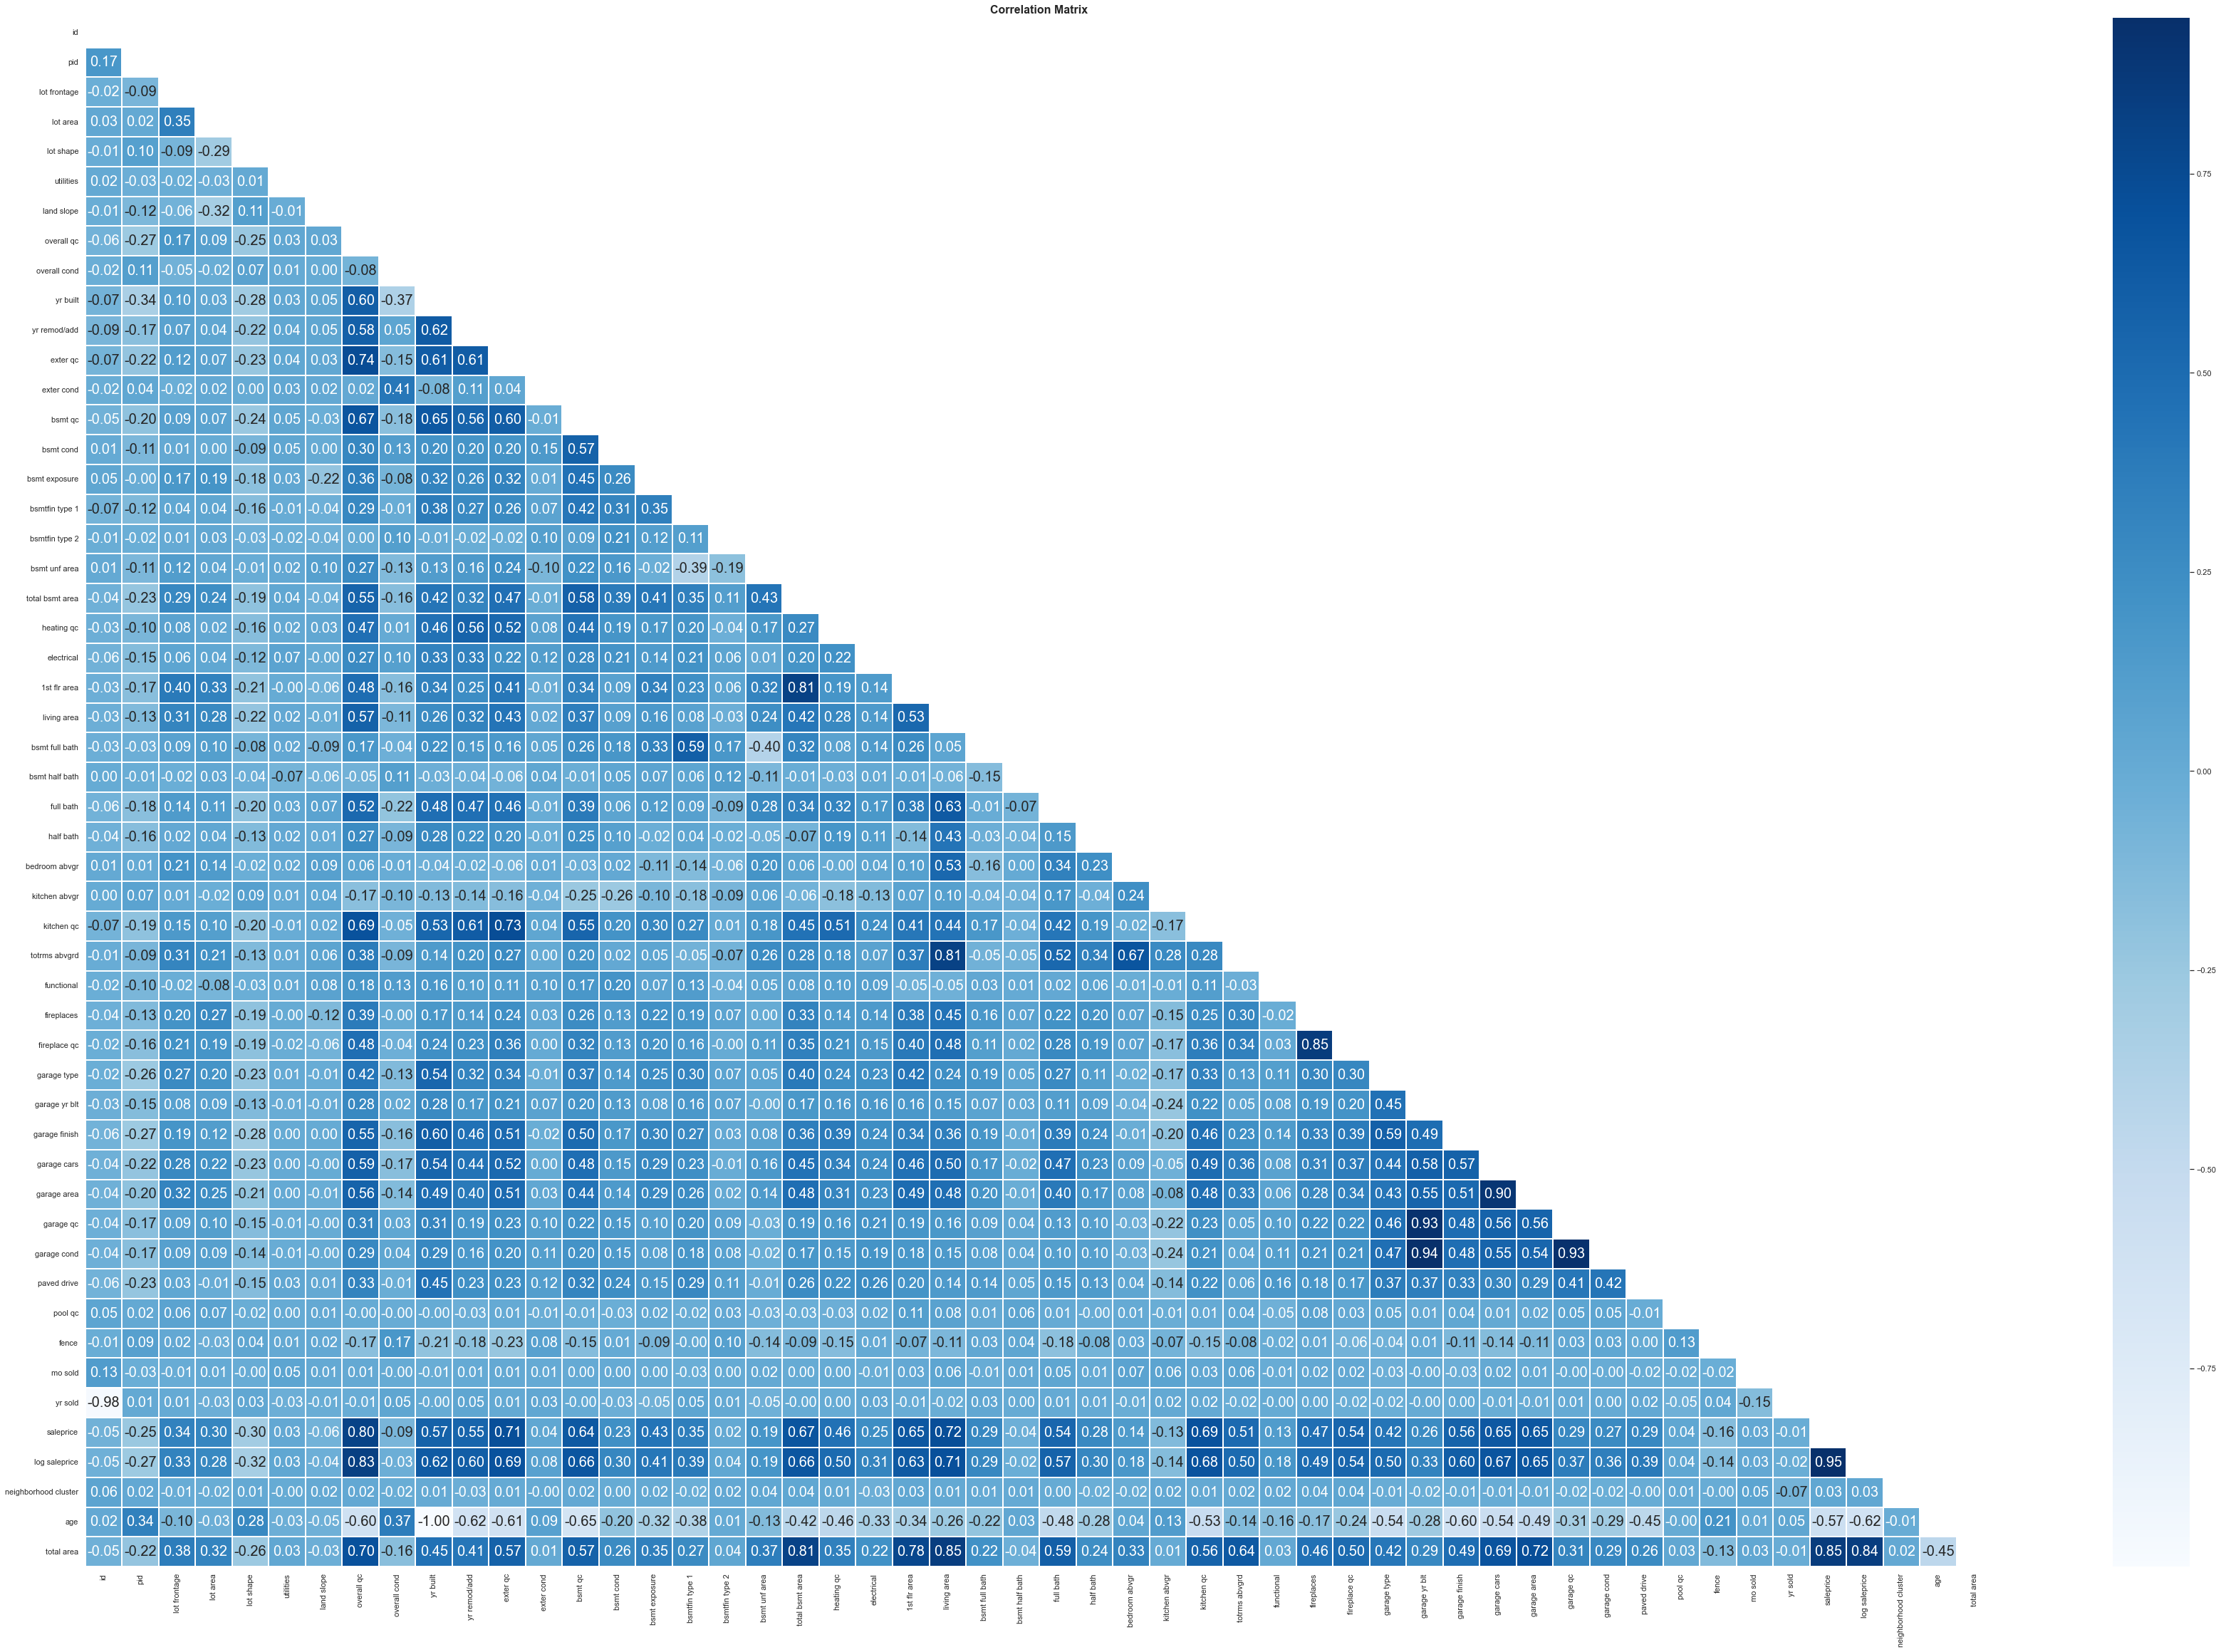

In [219]:
# Plot heatmap
plt.figure(figsize=(60,40))

# Create the matrix to mask the correlation matrix
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot=True, cmap='Blues', fmt='.2f', linewidths=2, mask=matrix, annot_kws={'fontsize':20})

# Set the label
plt.title('Correlation Matrix', loc='center', fontsize=16, fontweight='bold')

From the heatmap, majority of features do not seem to have a high correlation.

In [220]:
# Check correlation with Sale Price
df_train_sp_corr = df_train.corr()[['saleprice']].sort_values(by='saleprice', ascending = False)

Text(0.5, 1.0, 'Correlations with Sale Price')

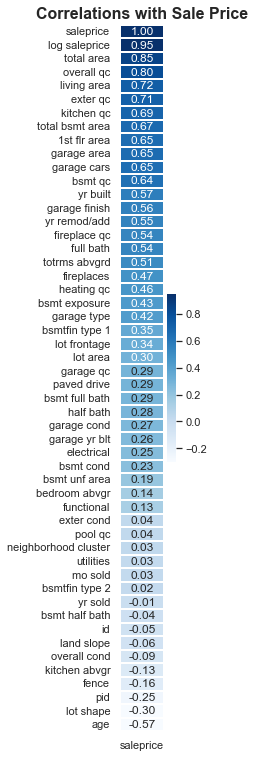

In [221]:
# Plot the heatmap
plt.figure(figsize = (1,13))
sns.heatmap(df_train_sp_corr, annot=True, cmap='Blues', fmt='.2f', linewidths=2, robust=True)
plt.title('Correlations with Sale Price', fontsize=16, fontweight='bold')

In [222]:
# Retreive feature with correlation > 0.5
df_train_corr_above_50 = abs(df_train_corr['saleprice'][df_train_corr['saleprice']>0.5]).sort_values(ascending=False)

print(f'Features with more than 0.5 correlation to SalePrice: ')
print()
print(df_train_corr_above_50 )

Features with more than 0.5 correlation to SalePrice: 

saleprice          1.000000
log saleprice      0.945836
total area         0.854643
overall qc         0.803652
living area        0.721935
exter qc           0.714556
kitchen qc         0.692746
total bsmt area    0.670107
1st flr area       0.654874
garage area        0.653895
garage cars        0.647456
bsmt qc            0.637314
yr built           0.572352
garage finish      0.559143
yr remod/add       0.549463
fireplace qc       0.539800
full bath          0.539714
totrms abvgrd      0.510749
Name: saleprice, dtype: float64


**EDA Summary:**

We observed the area and quality of the house have strong correlation to the sale price. The age of the house also shows an impact to the prices.

We also observed a few features seem to have correlation (e.g. kitchen qc and overall qc) but the observed variables also have high correlation with the Sale Price. Hence, for such cases, we will consider to retain them

The below features can be considered for the modeling to predict the house pricing based on the rational that the correlation with sale price is greater than 0.5 and a stronger correlation is observed from the EDA plots:
- total area
- overall qc
- living area
- exter qc
- kitchen qc
- total bsmt area
- 1st flr area
- garage area
- garage cars
- bsmt qc
- yr bulit
- garage finish
- yr remod/add
- fireplace qc
- full bath
- totalrm abvgrd
- cond 2
- building type
- foundation
- functionality

## 7. Export clean dataset for modeling

In [223]:
# Drop the neighborhood cluster column since the corrlation is not strong
df_train.drop(['neighborhood cluster'], axis=1, inplace=True)

In [224]:
df_train.shape

(2018, 72)

In [225]:
df_test.shape

(878, 70)

In [226]:
# Export data set to csv file
df_train.to_csv('../datasets/df_train_clean.csv', index=False)
df_test.to_csv('../datasets/df_test_clean.csv', index=False)

Note: Train dataset has 2 additional columns on Sale Price and Log Sale Price

### Continued in Notebook 2